### Get Country List
The country list is defined with economic and overall country performance, there are 15 unique values in the list.

In [1]:
# Create country list for analysis usage
country_economies = ['United States', 'China', 'Germany', 'Japan', 'India', 'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada']
country_overall = ['Switzerland', 'Canada', 'Sweden', 'Australia', 'United States', 'Japan', 'Germany', 'New Zealand', 'United Kingdom', 'Netherlands']

# Get unique country list
country_list = set(country_economies + country_overall)
print(f"Total {len(country_list)} countries.\n{country_list}")


Total 15 countries.
{'Canada', 'Brazil', 'Sweden', 'Netherlands', 'New Zealand', 'China', 'Japan', 'Switzerland', 'France', 'Australia', 'Italy', 'Germany', 'United States', 'India', 'United Kingdom'}


### Prepare energy_df

In [2]:
import pandas as pd

# Load data
usage_alter_engery = pd.read_csv("Energy_Alternative_nuclear.csv", header = 2, delimiter = ',')
usage_fossil_fuel = pd.read_csv("Energy_Fossil_fuel.csv", header = 2, delimiter = ',')
output_renewable = pd.read_csv("Energy_Renewable_electricity_output.csv", header = 2, delimiter = ',')
usage_renewable = pd.read_csv("renewable-share-energy.csv", delimiter = ',')


In [3]:
print("Check alternative energy consumption dataset:\n")
usage_alter_engery.head(3)

Check alternative energy consumption dataset:



Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   

                                      Indicator Name     Indicator Code  1960  \
0  Alternative and nuclear energy (% of total ene...  EG.USE.COMM.CL.ZS   NaN   
1  Alternative and nuclear energy (% of total ene...  EG.USE.COMM.CL.ZS   NaN   
2  Alternative and nuclear energy (% of total ene...  EG.USE.COMM.CL.ZS   NaN   

   1961  1962  1963  1964  1965  ...      2014  2015  2016  2017  2018  2019  \
0   NaN   NaN   NaN   NaN   NaN  ...       NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  2.584831   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...       NaN   NaN   NaN   NaN   NaN   NaN   

   2020  2021  2022  Unnamed: 67  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  

[3 rows x 68 columns]

In [4]:
print("Check fossil fuel consumption dataset:\n")
usage_fossil_fuel.head(3)

Check fossil fuel consumption dataset:



Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   

                                Indicator Name     Indicator Code  1960  1961  \
0  Fossil fuel energy consumption (% of total)  EG.USE.COMM.FO.ZS   NaN   NaN   
1  Fossil fuel energy consumption (% of total)  EG.USE.COMM.FO.ZS   NaN   NaN   
2  Fossil fuel energy consumption (% of total)  EG.USE.COMM.FO.ZS   NaN   NaN   

   1962  1963  1964  1965  ...       2014  2015  2016  2017  2018  2019  2020  \
0   NaN   NaN   NaN   NaN  ...        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN  ...  49.304292   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN  ...        NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2021  2022  Unnamed: 67  
0   NaN   NaN          NaN  
1   NaN   NaN          NaN  
2   NaN   NaN          NaN  

[3 rows x 68 columns]

In [5]:
print("Check renewable energy consumption dataset:\n")
usage_renewable.head(3)

Check renewable energy consumption dataset:



Entity Code  Year  Renewables (% equivalent primary energy)
0  Africa  NaN  1965                                  5.747495
1  Africa  NaN  1966                                  6.122062
2  Africa  NaN  1967                                  6.325731

In [6]:
print("Check renewable energy output dataset:\n")
output_renewable.head(3)

Check renewable energy output dataset:



Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   

                                      Indicator Name  Indicator Code  1960  \
0  Renewable electricity output (% of total elect...  EG.ELC.RNEW.ZS   NaN   
1  Renewable electricity output (% of total elect...  EG.ELC.RNEW.ZS   NaN   
2  Renewable electricity output (% of total elect...  EG.ELC.RNEW.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2014       2015  2016  2017  2018  \
0   NaN   NaN   NaN   NaN   NaN  ...  15.099280  14.856161   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  24.966589  25.675879   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...  85.323549  86.050111   NaN   NaN   NaN   

   2019  2020  2021  2022  Unnamed: 67  
0   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN          NaN  

[3 rows x 68 columns]

In [7]:
# Check data type between different df
usage_renewable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5603 non-null   object 
 1   Code                                      4292 non-null   object 
 2   Year                                      5603 non-null   int64  
 3   Renewables (% equivalent primary energy)  5603 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 175.2+ KB


In [8]:
# Drop column
usage_alter_engery = usage_alter_engery.drop(columns = ['Unnamed: 67'])
usage_fossil_fuel = usage_fossil_fuel.drop(columns = ['Unnamed: 67'])
output_renewable = output_renewable.drop(columns = ['Unnamed: 67'])

# Rename column
usage_renewable = usage_renewable.rename(columns = 
                                   {'Entity':'Country Name', 'Code':'Country Code', 'Year':'Year', 
                                    'Renewables (% equivalent primary energy)':'renewable_energy_use'})

In [9]:
# Show the number of unique country name
unique_alter_country = usage_alter_engery['Country Name'].unique()
print(f"Number of unique countries in alternative energy comsumption dataset is: {len(unique_alter_country)} ")

usage_fossil_fuel_country = usage_fossil_fuel['Country Name'].unique()
print(f"Number of unique countries in renewable energy comsumption dataset is: {len(usage_fossil_fuel_country)} ")

usage_renewable_country = usage_renewable['Country Name'].unique()
print(f"Number of unique countries in renewable energy comsumption dataset is: {len(usage_renewable_country)} ")

usage_renewable_country = usage_renewable['Country Name'].unique()
print(f"Number of unique countries in renewable energy comsumption dataset is: {len(usage_renewable_country)} ")


Number of unique countries in alternative energy comsumption dataset is: 266 
Number of unique countries in renewable energy comsumption dataset is: 266 
Number of unique countries in renewable energy comsumption dataset is: 104 
Number of unique countries in renewable energy comsumption dataset is: 104 


In [10]:
# Drop rows that are not in country list & indicator name column
usage_alter_engery = usage_alter_engery[usage_alter_engery['Country Name'].isin(country_list)].drop(columns = ['Indicator Name', 'Indicator Code'])
usage_fossil_fuel = usage_fossil_fuel[usage_fossil_fuel['Country Name'].isin(country_list)].drop(columns = ['Indicator Name', 'Indicator Code'])
output_renewable = output_renewable[output_renewable['Country Name'].isin(country_list)].drop(columns = ['Indicator Name', 'Indicator Code'])
usage_renewable = usage_renewable[usage_renewable['Country Name'].isin(country_list)]


In [11]:
# Check result
update_unique_alter_country = usage_alter_engery['Country Name'].unique()
print(f"Number of updated unique countries in alternative energy comsumption dataset is: {len(update_unique_alter_country)} ")

update_fossil_fuel_country = usage_fossil_fuel['Country Name'].unique()
print(f"Number of updated unique countries in renewable energy comsumption dataset is: {len(update_usage_renewable_country)} ")

update_usage_renewable_country = usage_renewable['Country Name'].unique()
print(f"Number of updated unique countries in renewable energy comsumption dataset is: {len(update_usage_renewable_country)} ")

update_output_renewable_country = output_renewable['Country Name'].unique()
print(f"Number of updated unique countries in renewable energy comsumption dataset is: {len(update_usage_renewable_country)} ")

# update_emission_co2_country = emission_co2['Country Name'].unique()
# print(f"Number of updated unique countries in CO2 emission dataset is: {len(update_emission_co2_country)} ")


Number of updated unique countries in alternative energy comsumption dataset is: 15 


NameError: name 'update_usage_renewable_country' is not defined

In [12]:
# Convert data into long form
usage_alter_engery = pd.melt(usage_alter_engery, id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', value_name='alter_energy_use')

usage_fossil_fuel = pd.melt(usage_fossil_fuel, id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', value_name='fossil_fuel_use')

output_renewable = pd.melt(output_renewable, id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', value_name='renewable_energy_output')

# usage_renewable = pd.melt(usage_renewable, id_vars=['Country Name', 'Country Code'], 
#                   var_name='Year', value_name='renewable_energy_use')

# Change data type
usage_alter_engery['Year'] = usage_alter_engery['Year'].astype(int)
usage_fossil_fuel['Year'] = usage_fossil_fuel['Year'].astype(int)
output_renewable['Year'] = output_renewable['Year'].astype(int)

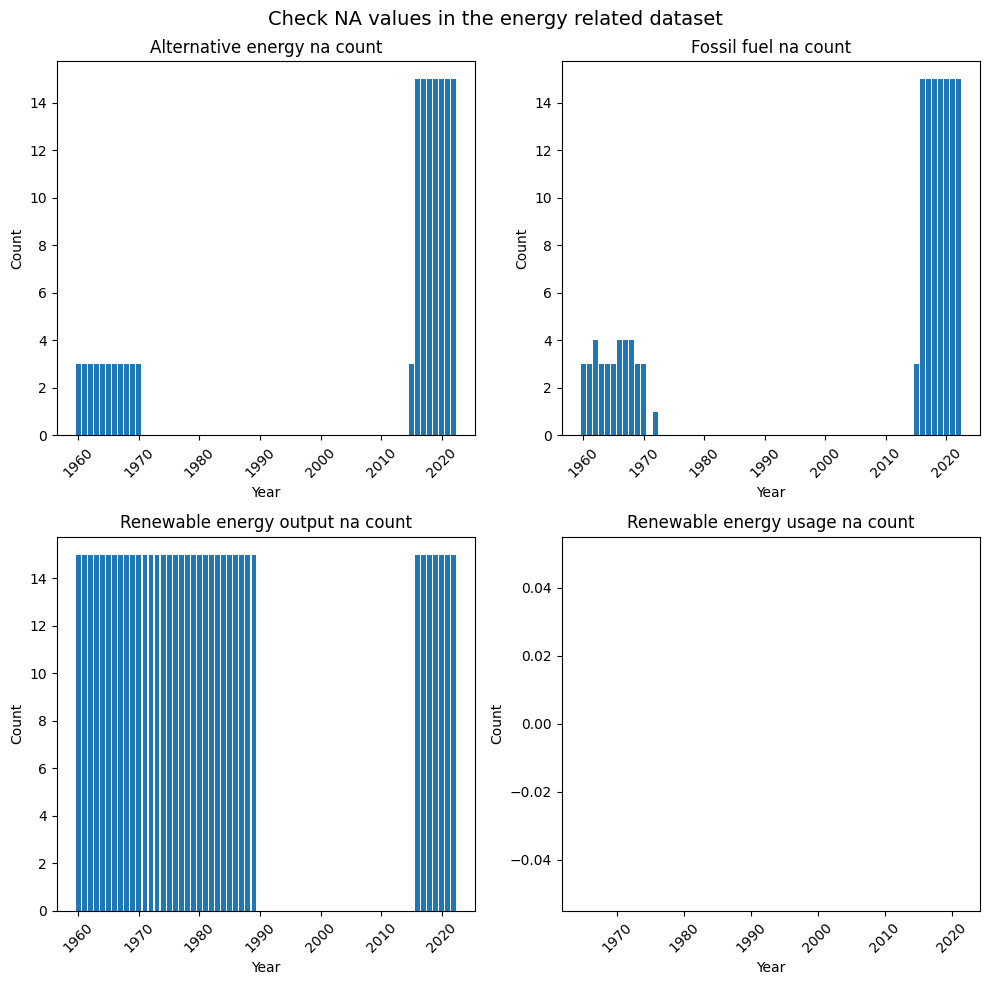

In [13]:
import matplotlib.pyplot as plt

# Count NaN values by year
alter_na_counts = usage_alter_engery.groupby('Year')['alter_energy_use'].apply(lambda x: x.isnull().sum())
fossil_na_counts = usage_fossil_fuel.groupby('Year')['fossil_fuel_use'].apply(lambda x: x.isnull().sum())
renew_out_na_counts = output_renewable.groupby('Year')['renewable_energy_output'].apply(lambda x: x.isnull().sum())
renew_use_na_counts = usage_renewable.groupby('Year')['renewable_energy_use'].apply(lambda x: x.isnull().sum())

fig, axes = plt.subplots(2, 2, figsize = (10,10))
# Plot the count of NaN values by year
axes[0][0].bar(alter_na_counts.index, alter_na_counts.values)
axes[0][0].set_title('Alternative energy na count')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Count')
axes[0][0].tick_params(axis = 'x', rotation=45)

axes[0][1].bar(fossil_na_counts.index, fossil_na_counts.values)
axes[0][1].set_title('Fossil fuel na count')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Count')
axes[0][1].tick_params(axis = 'x', rotation=45)

axes[1][0].bar(renew_out_na_counts.index, renew_out_na_counts.values)
axes[1][0].set_title('Renewable energy output na count')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Count')
axes[1][0].tick_params(axis = 'x', rotation=45)

axes[1][1].bar(renew_use_na_counts.index, renew_use_na_counts.values)
axes[1][1].set_title('Renewable energy usage na count')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Count')
axes[1][1].tick_params(axis = 'x', rotation=45)

fig.suptitle("Check NA values in the energy related dataset", fontsize = 14)
plt.tight_layout()

plt.show()

In [14]:
# Merge into one df
energy_df = pd.merge(usage_alter_engery, usage_fossil_fuel, on=['Country Name', 'Country Code', 'Year'], how='outer')
energy_df = pd.merge(energy_df, usage_renewable, on=['Country Name', 'Country Code', 'Year'], how='outer')
energy_df = pd.merge(energy_df, output_renewable, on=['Country Name', 'Country Code', 'Year'], how='outer')

# Check df
energy_df

Country Name Country Code  Year  alter_energy_use  fossil_fuel_use  \
0        Australia          AUS  1960          1.092123        85.906692   
1        Australia          AUS  1961          1.216693        86.251912   
2        Australia          AUS  1962          1.240643        87.069934   
3        Australia          AUS  1963          1.578166        87.128218   
4        Australia          AUS  1964          1.572712        87.975807   
..             ...          ...   ...               ...              ...   
940  United States          USA  2018               NaN              NaN   
941  United States          USA  2019               NaN              NaN   
942  United States          USA  2020               NaN              NaN   
943  United States          USA  2021               NaN              NaN   
944  United States          USA  2022               NaN              NaN   

     renewable_energy_use  renewable_energy_output  
0                     NaN                      NaN  
1                     NaN                      NaN  
2                     NaN                      NaN  
3                     NaN                      NaN  
4                     NaN                      NaN  
..                    ...                      ...  
940              8.964939                      NaN  
941              9.315263                      NaN  
942             10.532232                      NaN  
943             10.655991                      NaN  
944                   NaN                      NaN  

[945 rows x 7 columns]

In [15]:
# Select data after year 1990
energy_df = energy_df[energy_df['Year'] >= 1990]
energy_df.shape

(495, 7)

In [16]:
# Check missing values
print("Number of missing values after year 1991 in energy related datasets:\n")
print(energy_df.isnull().sum())

Number of missing values after year 1991 in energy related datasets:

Country Name                 0
Country Code                 0
Year                         0
alter_energy_use           108
fossil_fuel_use            108
renewable_energy_use        15
renewable_energy_output    105
dtype: int64


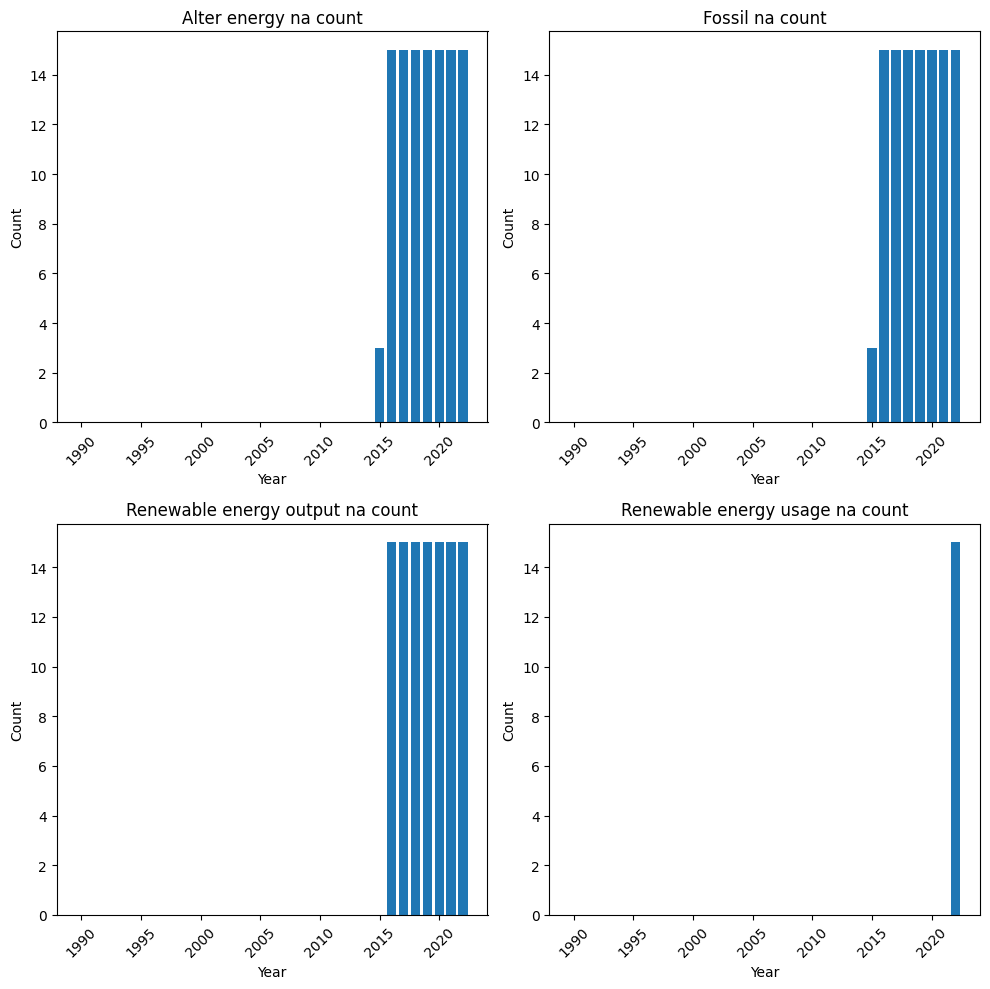

In [17]:
import matplotlib.pyplot as plt

# Count NaN values by year
update_alter_na_counts = energy_df.groupby('Year')['alter_energy_use'].apply(lambda x: x.isnull().sum())
update_fossil_na_counts = energy_df.groupby('Year')['fossil_fuel_use'].apply(lambda x: x.isnull().sum())
update_renew_out_na_counts = energy_df.groupby('Year')['renewable_energy_output'].apply(lambda x: x.isnull().sum())
update_renew_use_na_counts = energy_df.groupby('Year')['renewable_energy_use'].apply(lambda x: x.isnull().sum())

fig, axes = plt.subplots(2, 2, figsize = (10,10))
# Plot the count of NaN values by year
axes[0][0].bar(update_alter_na_counts.index, update_alter_na_counts.values)
axes[0][0].set_title('Alter energy na count')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Count')
axes[0][0].tick_params(axis = 'x', rotation=45)

axes[0][1].bar(update_fossil_na_counts.index, update_fossil_na_counts.values)
axes[0][1].set_title('Fossil na count')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Count')
axes[0][1].tick_params(axis = 'x', rotation=45)

axes[1][0].bar(update_renew_out_na_counts.index, update_renew_out_na_counts.values)
axes[1][0].set_title('Renewable energy output na count')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Count')
axes[1][0].tick_params(axis = 'x', rotation=45)

axes[1][1].bar(update_renew_use_na_counts.index, update_renew_use_na_counts.values)
axes[1][1].set_title('Renewable energy usage na count')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Count')
axes[1][1].tick_params(axis = 'x', rotation=45)

plt.tight_layout()

plt.show()

#### Impute missing values

- data = energy_df (filtered year >= 1990)
- model: linear model
- step:
    1. separate data
    2. check relationship using ggpairs
    3. using model to predict
    4. impute missing values
    
- discover:
    1. Use Year with alter_energy_use, fossil_fuel_use, renewable_energy_use
    2. Use renewable energy_use predict renewable_energy_output

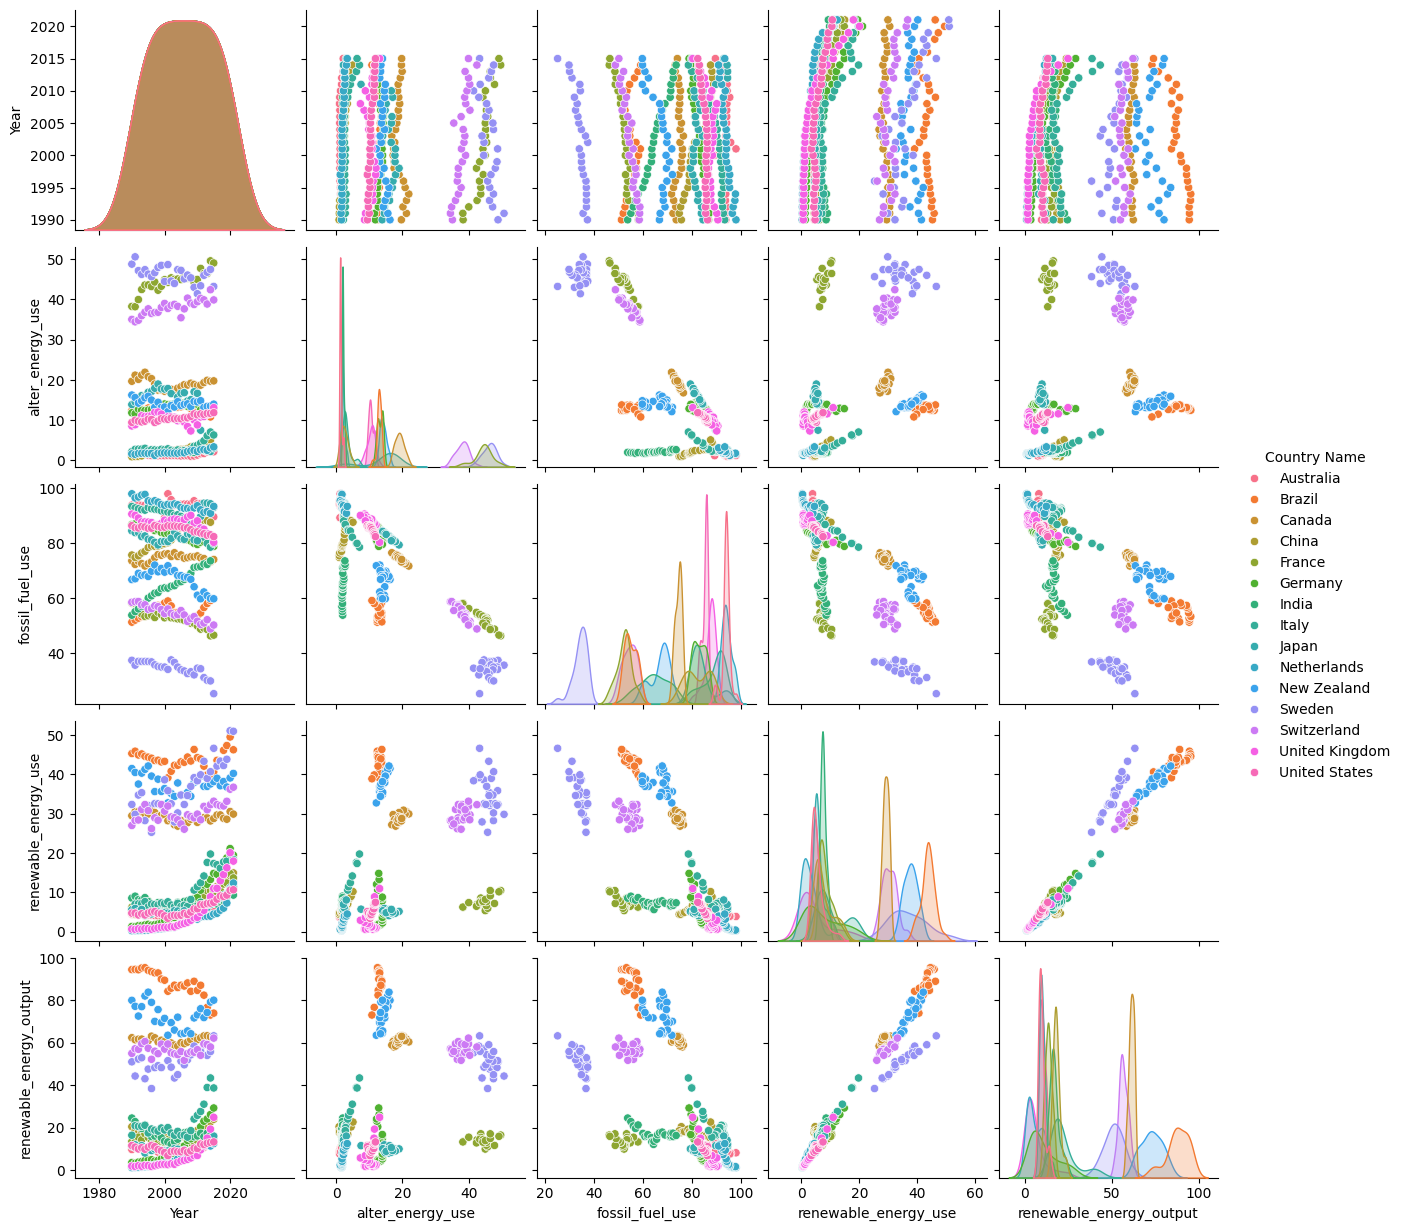

In [18]:
import seaborn as sns

# Check correlationship in energy_df
pair_energy = sns.pairplot(energy_df, hue='Country Name')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Group data by country
grouped_data = energy_df.groupby('Country Name')

# For imput alternative energy use
for country, data in grouped_data:
    feature_column = 'alter_energy_use'
    
    train_data = data.dropna(subset=[feature_column])
    test_data = data[data[feature_column].isna()]

    X_train = train_data['Year'].values.reshape(-1, 1)
    y_train = train_data[feature_column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data['Year'].values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    energy_df.loc[energy_df.index.isin(test_data.index), feature_column] = np.squeeze(y_pred)

# For imput fossil fuel use
for country, data in grouped_data:
    feature_column = 'fossil_fuel_use'
    
    train_data = data.dropna(subset=[feature_column])
    test_data = data[data[feature_column].isna()]

    X_train = train_data['Year'].values.reshape(-1, 1)
    y_train = train_data[feature_column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data['Year'].values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    energy_df.loc[energy_df.index.isin(test_data.index), feature_column] = np.squeeze(y_pred)

# For imput renewable energy use
for country, data in grouped_data:
    feature_column = 'renewable_energy_use'
    
    train_data = data.dropna(subset=[feature_column])
    test_data = data[data[feature_column].isna()]

    X_train = train_data['Year'].values.reshape(-1, 1)
    y_train = train_data[feature_column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data['Year'].values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    energy_df.loc[energy_df.index.isin(test_data.index), feature_column] = np.squeeze(y_pred)

# For imput renewable energy output
for country, data in grouped_data:
    feature_column = 'renewable_energy_output'
    
    train_data = data.dropna(subset=[feature_column])
    test_data = data[data[feature_column].isna()]

    X_train = train_data['renewable_energy_use'].values.reshape(-1, 1)
    y_train = train_data[feature_column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data['renewable_energy_use'].values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    energy_df.loc[energy_df.index.isin(test_data.index), feature_column] = np.squeeze(y_pred)


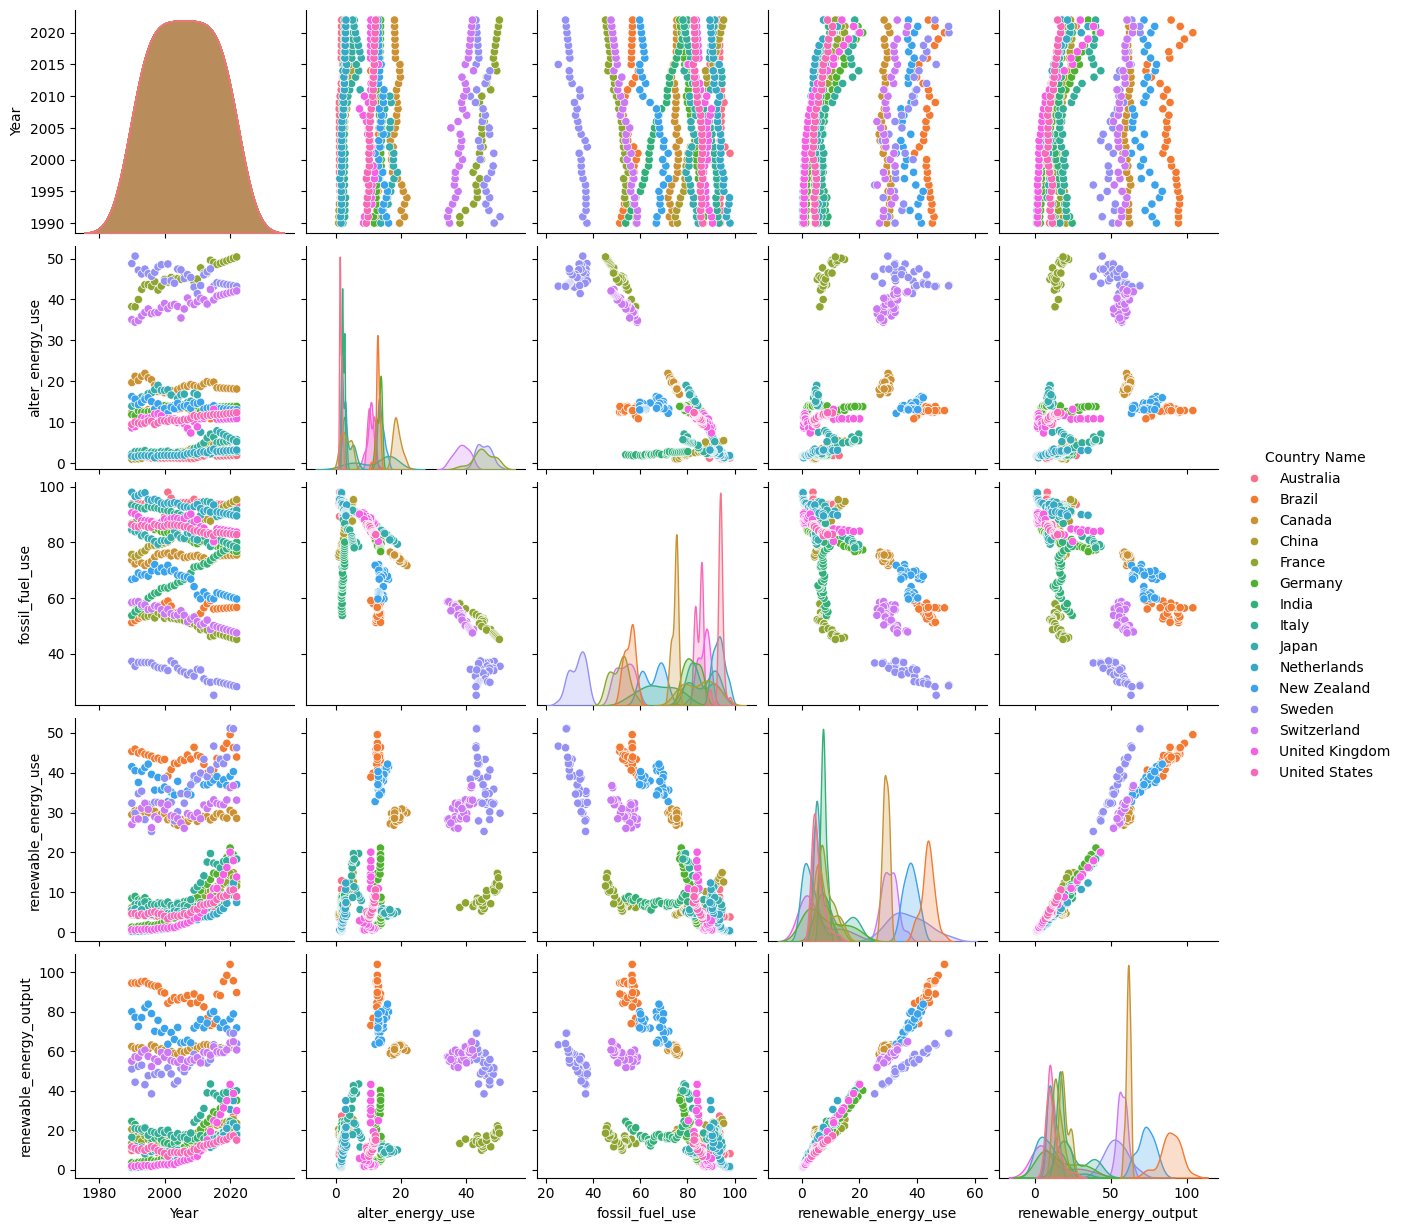

In [20]:
# Check correlationship in imputed energy_df
sns.pairplot(energy_df, hue='Country Name')

In [21]:
# Check result
print("Missing values in energy data frame:\n")
print(energy_df.isnull().sum())

Missing values in energy data frame:

Country Name               0
Country Code               0
Year                       0
alter_energy_use           0
fossil_fuel_use            0
renewable_energy_use       0
renewable_energy_output    0
dtype: int64


### Prepare evaluate_df

In [22]:
import pandas as pd

# Load data
gdp = pd.read_csv("GDP.csv", delimiter = ',')
emission_co2 = pd.read_csv("co-emissions-per-capita.csv", delimiter = ',')

In [23]:
# Rename column names
emission_co2 = emission_co2.rename(columns = 
                                   {'Entity':'Country Name', 'Code':'Country Code', 
                                    'Year':'Year', 'Annual CO₂ emissions (per capita)':'CO2'})

In [24]:
# Keep rows that country names are in country list
gdp = gdp[gdp['Country Name'].isin(country_list)]
emission_co2 = emission_co2[emission_co2['Country Name'].isin(country_list)]


In [25]:
# Convert data into long form
gdp = pd.melt(gdp, id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', value_name='gdp')

# Revise data type
gdp['Year'] = gdp['Year'].astype(int)

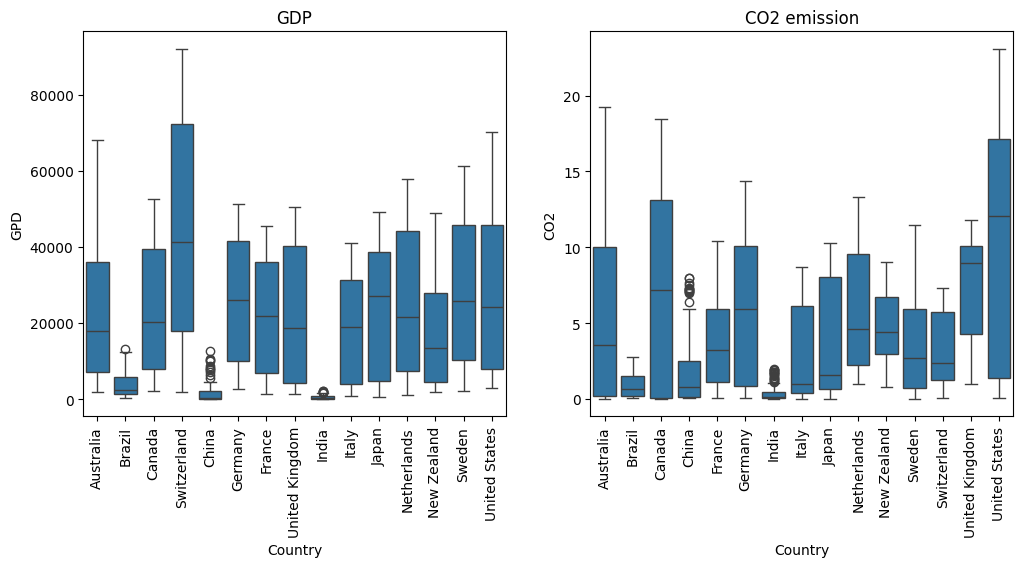

In [26]:
# Check data by plots
fig, axes = plt.subplots(1,2, figsize = (12,5))

sns.boxplot(x = 'Country Name', y = 'gdp', data = gdp, ax = axes[0])
axes[0].set_title('GDP')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('GPD')
axes[0].tick_params(axis = 'x', rotation = 90)

sns.boxplot(x = 'Country Name', y = 'CO2', data = emission_co2, ax = axes[1])
axes[1].set_title('CO2 emission')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('CO2')
axes[1].tick_params(axis = 'x', rotation = 90)


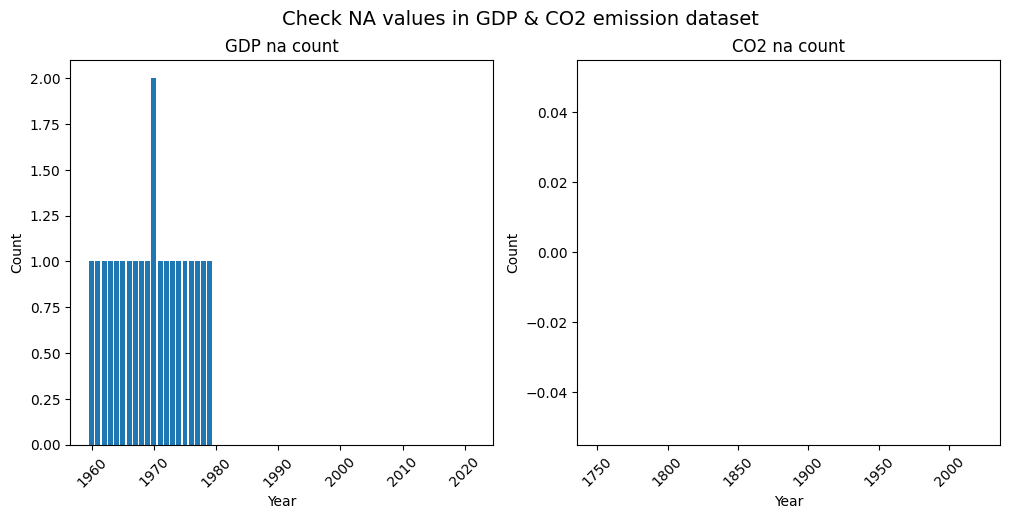

In [27]:
# Count NaN values by year
gdp_na_counts = gdp.groupby('Year')['gdp'].apply(lambda x: x.isnull().sum())
co2_na_counts = emission_co2.groupby('Year')['CO2'].apply(lambda x: x.isnull().sum())

fig, axes = plt.subplots(1, 2, figsize = (12,5))

# Plot the count of NaN values by year
axes[0].bar(gdp_na_counts.index, gdp_na_counts.values)
axes[0].set_title('GDP na count')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis = 'x', rotation=45)

axes[1].bar(co2_na_counts.index, co2_na_counts.values)
axes[1].set_title('CO2 na count')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis = 'x', rotation=45)

fig.suptitle("Check NA values in GDP & CO2 emission dataset", fontsize = 14)
plt.show()

In [28]:
# Merge into 1 df 
evaluate_df = pd.merge(gdp, emission_co2, on=['Country Name', 'Country Code', 'Year'], how='outer')
evaluate_df

Country Name Country Code  Year          gdp        CO2
0         Australia          AUS  1750          NaN   0.000000
1         Australia          AUS  1760          NaN   0.000000
2         Australia          AUS  1770          NaN   0.000000
3         Australia          AUS  1780          NaN   0.000000
4         Australia          AUS  1790          NaN   0.000000
...             ...          ...   ...          ...        ...
2718  United States          USA  2018  62823.30944  16.191355
2719  United States          USA  2019  65120.39466  15.739861
2720  United States          USA  2020  63530.63348  14.034053
2721  United States          USA  2021  70248.62900  14.932488
2722  United States          USA  2022          NaN  14.949616

[2723 rows x 5 columns]

In [29]:
# Select data year after 1990
evaluate_df = evaluate_df[(evaluate_df['Year'] > 1990)]
evaluate_df.shape

(480, 5)

In [30]:
# Check missing values
print("Number of missing values after year 1991 in GDP & CO2 emission datasets:\n")
print(evaluate_df.isnull().sum())

Number of missing values after year 1991 in GDP & CO2 emission datasets:

Country Name     0
Country Code     0
Year             0
gdp             15
CO2              0
dtype: int64


In [31]:
# Group data by country
grouped_data = evaluate_df.groupby('Country Name')

# For impute alternative energy use missing values
for country, data in grouped_data:
    feature_column = 'gdp'
    
    train_data = data.dropna(subset=[feature_column])
    test_data = data[data[feature_column].isna()]

    X_train = train_data['Year'].values.reshape(-1, 1)
    y_train = train_data[feature_column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data['Year'].values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    evaluate_df.loc[evaluate_df.index.isin(test_data.index), feature_column] = np.squeeze(y_pred)



In [32]:
# Check missing values
evaluate_df.isnull().sum()

Country Name    0
Country Code    0
Year            0
gdp             0
CO2             0
dtype: int64

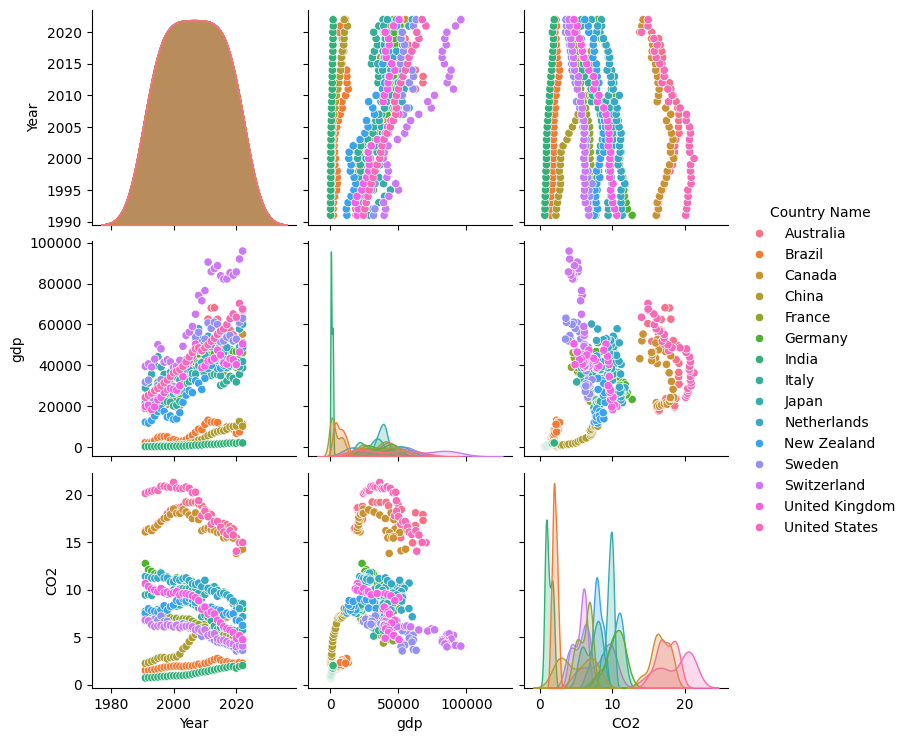

In [33]:
# Check data by ploy
sns.pairplot(evaluate_df, hue = 'Country Name')

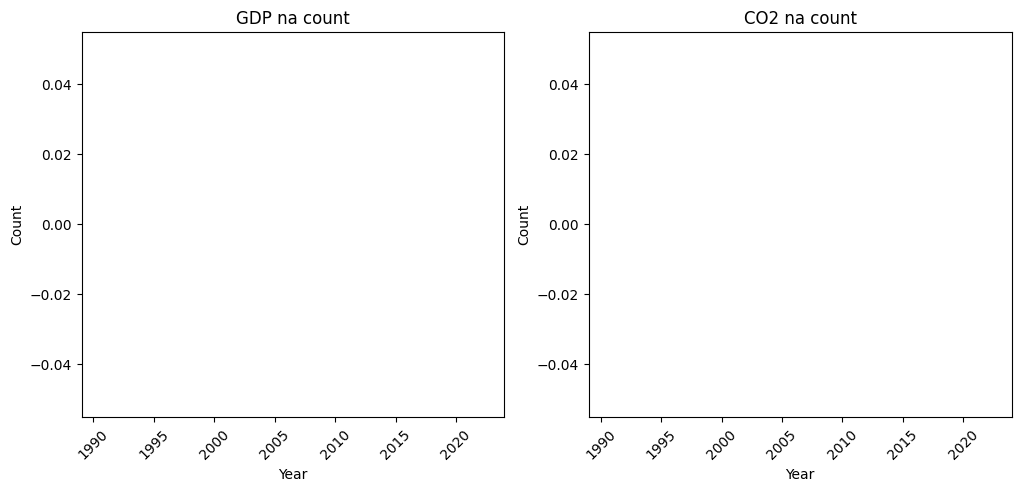

In [34]:
# Count NaN values by year
update_gdp_na_counts = evaluate_df.groupby('Year')['gdp'].apply(lambda x: x.isnull().sum())
update_co2_na_counts = evaluate_df.groupby('Year')['CO2'].apply(lambda x: x.isnull().sum())

fig, axes = plt.subplots(1, 2, figsize = (12,5))
# Plot the count of NaN values by year
axes[0].bar(update_gdp_na_counts.index, update_gdp_na_counts.values)
axes[0].set_title('GDP na count')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis = 'x', rotation=45)

axes[1].bar(update_co2_na_counts.index, update_co2_na_counts.values)
axes[1].set_title('CO2 na count')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis = 'x', rotation=45)

plt.show()

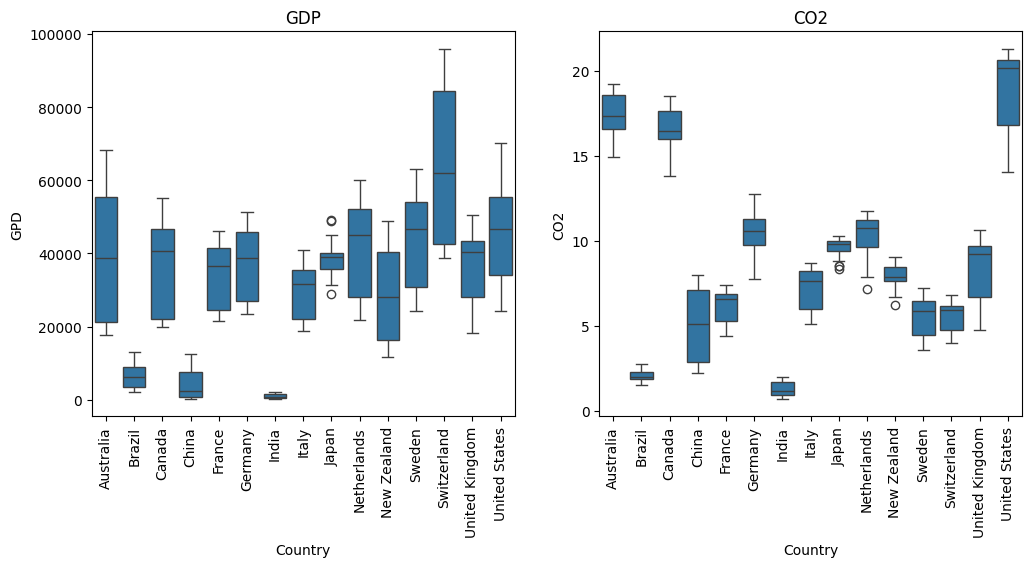

In [35]:

fig, axes = plt.subplots(1,2, figsize = (12,5))

sns.boxplot(x = 'Country Name', y = 'gdp', data = evaluate_df, ax = axes[0])
axes[0].set_title('GDP')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('GPD')
axes[0].tick_params(axis = 'x', rotation = 90)

sns.boxplot(x = 'Country Name', y = 'CO2', data = evaluate_df, ax = axes[1])
axes[1].set_title('CO2')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('CO2')
axes[1].tick_params(axis = 'x', rotation = 90)

### Prepare landscape_df

In [36]:
# Load data
area_forest = pd.read_csv("Environment_Forest_area.csv", header = 2, delimiter = ',')
area_land = pd.read_csv("Environment_Land_area.csv", header = 2, delimiter = ',')
area_surface = pd.read_csv("Environment_Surface_area.csv", header = 2, delimiter = ',')


In [37]:
# Drop columns: Unnamed: 67
area_forest = area_forest.drop(columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 67'])
area_land = area_land.drop(columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 67'])
area_surface = area_surface.drop(columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 67'])

In [38]:
# Keep rows that country names are in country list
area_forest = area_forest[area_forest['Country Name'].isin(country_list)]
area_land = area_land[area_land['Country Name'].isin(country_list)]
area_surface = area_surface[area_surface['Country Name'].isin(country_list)]

In [39]:
# Convert data into long form & revise on data types
area_forest = pd.melt(area_forest, id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', value_name='area_forest')
area_forest['Year'] = area_forest['Year'].astype(int)

area_land = pd.melt(area_land, id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', value_name='area_land')
area_land['Year'] = area_land['Year'].astype(int)

area_surface = pd.melt(area_surface, id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', value_name='area_surface')
area_surface['Year'] = area_surface['Year'].astype(int)

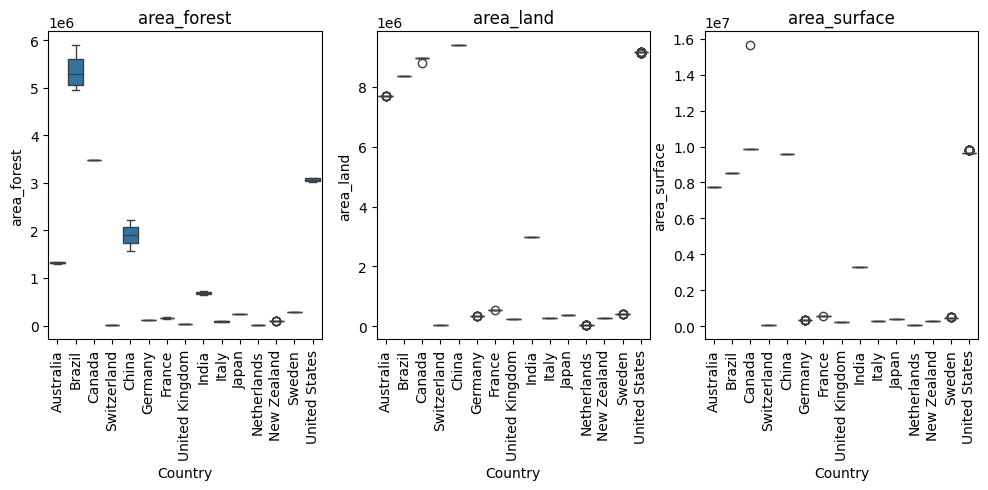

In [40]:
# Check outliers

fig, axes = plt.subplots(1,3, figsize = (12,4))

sns.boxplot(x = 'Country Name', y = 'area_forest', data = area_forest, ax = axes[0])
axes[0].set_title('area_forest')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('area_forest')
axes[0].tick_params(axis = 'x', rotation = 90)

sns.boxplot(x = 'Country Name', y = 'area_land', data = area_land, ax = axes[1])
axes[1].set_title('area_land')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('area_land')
axes[1].tick_params(axis = 'x', rotation = 90)

sns.boxplot(x = 'Country Name', y = 'area_surface', data = area_surface, ax = axes[2])
axes[2].set_title('area_surface')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('area_surface')
axes[2].tick_params(axis = 'x', rotation = 90)

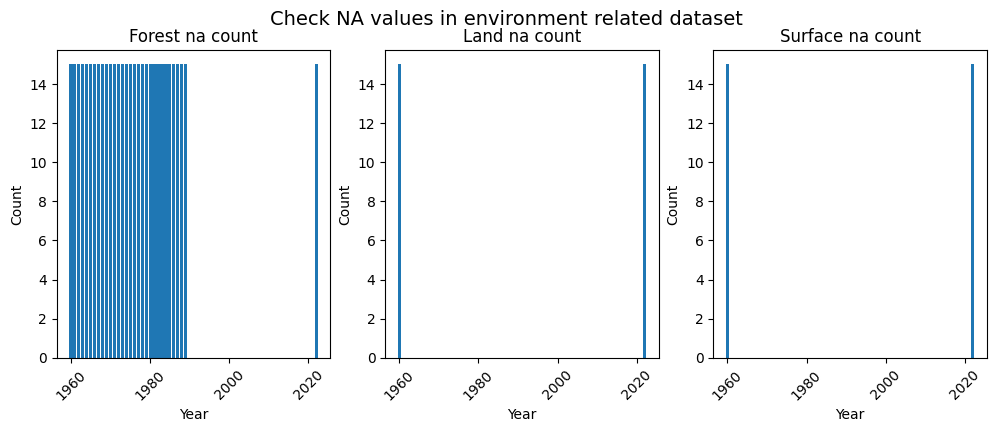

In [41]:
# Count NaN values by year
area_forest_na_counts = area_forest.groupby('Year')['area_forest'].apply(lambda x: x.isnull().sum())
area_land_na_counts = area_land.groupby('Year')['area_land'].apply(lambda x: x.isnull().sum())
area_surface_na_counts = area_surface.groupby('Year')['area_surface'].apply(lambda x: x.isnull().sum())

fig, axes = plt.subplots(1, 3, figsize = (12,4))

# Plot the count of NaN values by year
axes[0].bar(area_forest_na_counts.index, area_forest_na_counts.values)
axes[0].set_title('Forest na count')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis = 'x', rotation=45)

axes[1].bar(area_land_na_counts.index, area_land_na_counts.values)
axes[1].set_title('Land na count')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis = 'x', rotation=45)

axes[2].bar(area_surface_na_counts.index, area_surface_na_counts.values)
axes[2].set_title('Surface na count')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis = 'x', rotation=45)

fig.suptitle("Check NA values in environment related dataset", fontsize = 14)
plt.show()

In [42]:
# Merge data frames into 1
environment_df = pd.merge(area_forest, area_land, on=['Country Name', 'Country Code', 'Year'], how='outer')
environment_df = pd.merge(environment_df, area_surface, on=['Country Name', 'Country Code', 'Year'], how='outer')
environment_df

Country Name Country Code  Year  area_forest  area_land  area_surface
0        Australia          AUS  1960          NaN        NaN           NaN
1        Australia          AUS  1961          NaN  7682300.0     7741220.0
2        Australia          AUS  1962          NaN  7682300.0     7741220.0
3        Australia          AUS  1963          NaN  7682300.0     7741220.0
4        Australia          AUS  1964          NaN  7682300.0     7741220.0
..             ...          ...   ...          ...        ...           ...
940  United States          USA  2018    3097950.0  9147420.0     9831510.0
941  United States          USA  2019    3097950.0  9147420.0     9831510.0
942  United States          USA  2020    3097950.0  9147420.0     9831510.0
943  United States          USA  2021    3097950.0  9147420.0     9831510.0
944  United States          USA  2022          NaN        NaN           NaN

[945 rows x 6 columns]

In [43]:
# Select data after year 1990
environment_df = environment_df[environment_df['Year'] >= 1990]

In [44]:
# Check missing values
print("Number of missing values after year 1991 in environment related datasets:\n")
print(environment_df.isnull().sum())

Number of missing values after year 1991 in environment related datasets:

Country Name     0
Country Code     0
Year             0
area_forest     15
area_land       15
area_surface    15
dtype: int64


In [45]:
# Group data by country
grouped_data = environment_df.groupby('Country Name')

# For impute forest area missing values
for country, data in grouped_data:
    feature_column = 'area_forest'
    
    train_data = data.dropna(subset=[feature_column])
    test_data = data[data[feature_column].isna()]

    X_train = train_data['Year'].values.reshape(-1, 1)
    y_train = train_data[feature_column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data['Year'].values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    environment_df.loc[environment_df.index.isin(test_data.index), feature_column] = np.squeeze(y_pred)

environment_df['area_land'] = environment_df.groupby('Country Name')['area_land'].fillna(method='ffill')
environment_df['area_surface'] = environment_df.groupby('Country Name')['area_surface'].fillna(method='ffill')


/var/folders/r3/ktm_c1q93_76f367sgrz8vqc0000gn/T/ipykernel_30951/1612545176.py:22: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  environment_df['area_land'] = environment_df.groupby('Country Name')['area_land'].fillna(method='ffill')
/var/folders/r3/ktm_c1q93_76f367sgrz8vqc0000gn/T/ipykernel_30951/1612545176.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  environment_df['area_land'] = environment_df.groupby('Country Name')['area_land'].fillna(method='ffill')
/var/folders/r3/ktm_c1q93_76f367sgrz8vqc0000gn/T/ipykernel_30951/1612545176.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

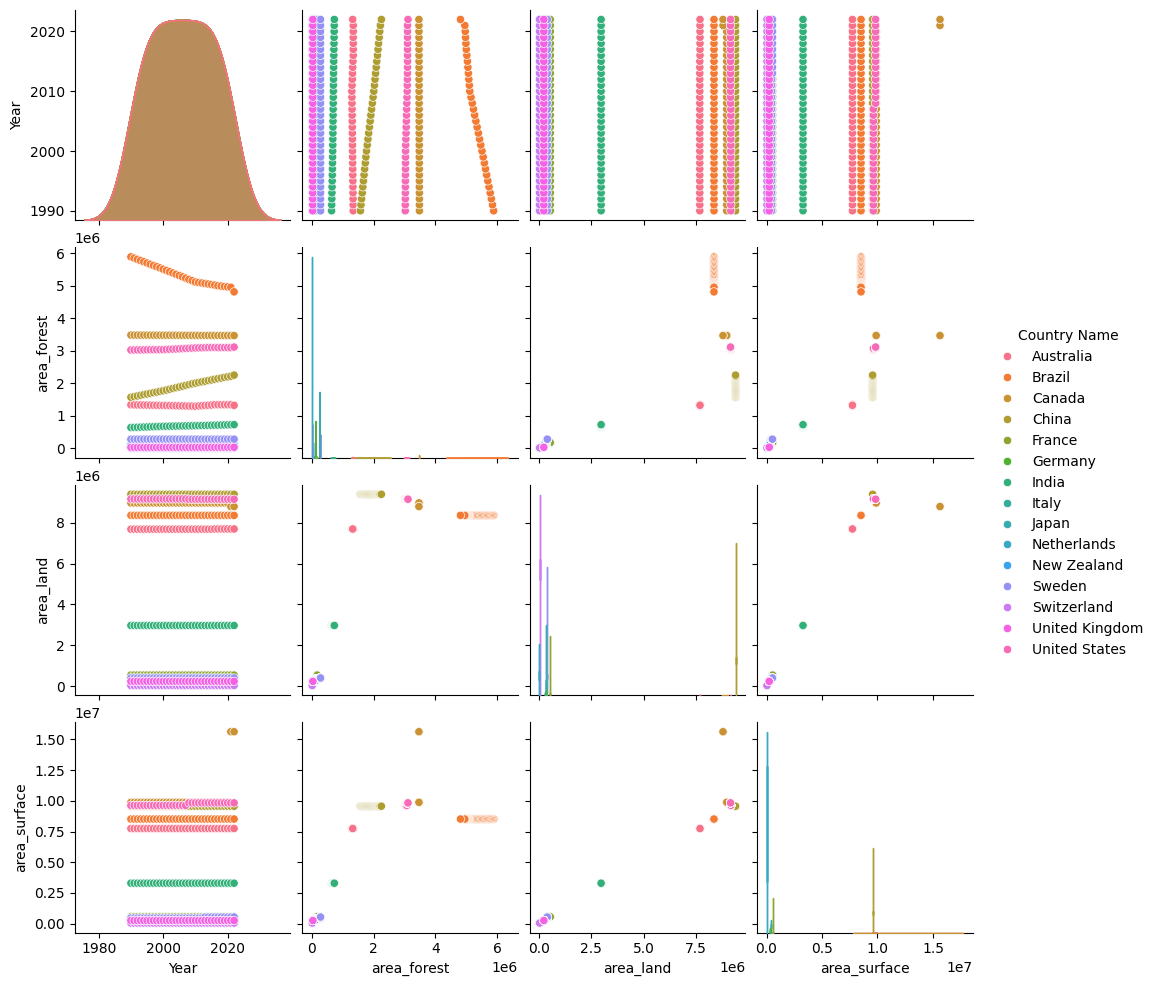

In [46]:
# Check data
sns.pairplot(environment_df, hue ='Country Name')

In [47]:
# Check missing values
environment_df.isnull().sum()

Country Name    0
Country Code    0
Year            0
area_forest     0
area_land       0
area_surface    0
dtype: int64

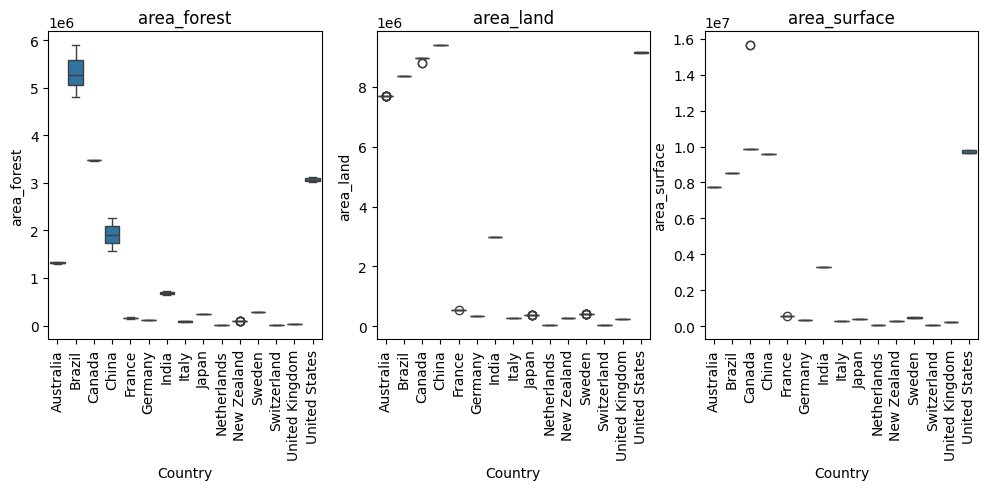

In [48]:
# Check outliers
fig, axes = plt.subplots(1,3, figsize = (12,4))

sns.boxplot(x = 'Country Name', y = 'area_forest', data = environment_df, ax = axes[0])
axes[0].set_title('area_forest')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('area_forest')
axes[0].tick_params(axis = 'x', rotation = 90)

sns.boxplot(x = 'Country Name', y = 'area_land', data = environment_df, ax = axes[1])
axes[1].set_title('area_land')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('area_land')
axes[1].tick_params(axis = 'x', rotation = 90)

sns.boxplot(x = 'Country Name', y = 'area_surface', data = environment_df, ax = axes[2])
axes[2].set_title('area_surface')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('area_surface')
axes[2].tick_params(axis = 'x', rotation = 90)

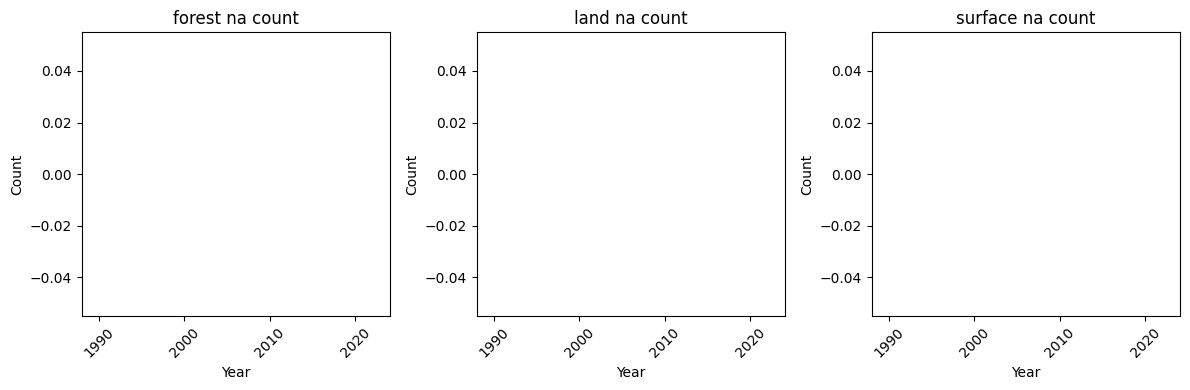

In [49]:
# Count NaN values by year
update_area_forest_na_counts = environment_df.groupby('Year')['area_forest'].apply(lambda x: x.isnull().sum())
update_area_land_na_counts = environment_df.groupby('Year')['area_land'].apply(lambda x: x.isnull().sum())
update_area_surface_na_counts = environment_df.groupby('Year')['area_surface'].apply(lambda x: x.isnull().sum())

fig, axes = plt.subplots(1, 3, figsize = (12,4))

# Plot the count of NaN values by year
axes[0].bar(update_area_forest_na_counts.index, update_area_forest_na_counts.values)
axes[0].set_title('forest na count')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis = 'x', rotation=45)

axes[1].bar(update_area_land_na_counts.index, update_area_land_na_counts.values)
axes[1].set_title('land na count')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis = 'x', rotation=45)

axes[2].bar(update_area_surface_na_counts.index, update_area_surface_na_counts.values)
axes[2].set_title('surface na count')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis = 'x', rotation=45)

plt.tight_layout()

plt.show()

### Clean data & Add income group columns

In [50]:
# Load data
country_category = pd.read_csv("Metadata_Country.csv")
country_category

Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFE                         NaN                  NaN   
2            AFG                  South Asia           Low income   
3            AFW                         NaN                  NaN   
4            AGO          Sub-Saharan Africa  Lower middle income   
..           ...                         ...                  ...   
260          XKX       Europe & Central Asia  Upper middle income   
261          YEM  Middle East & North Africa           Low income   
262          ZAF          Sub-Saharan Africa  Upper middle income   
263          ZMB          Sub-Saharan Africa  Lower middle income   
264          ZWE          Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes  \
0                                                  NaN   
1    26 countries, stretching from the Red Sea in t...   
2    The reporting period for national accounts dat...   
3    22 countries, stretching from the westernmost ...   
4    The World Bank systematically assesses the app...   
..                                                 ...   
260                                                NaN   
261  The World Bank systematically assesses the app...   
262  Fiscal year end: March 31; reporting period fo...   
263  National accounts data were rebased to reflect...   
264  National Accounts data are reported in Zimbabw...   

                       TableName  Unnamed: 5  
0                          Aruba         NaN  
1    Africa Eastern and Southern         NaN  
2                    Afghanistan         NaN  
3     Africa Western and Central         NaN  
4                         Angola         NaN  
..                           ...         ...  
260                       Kosovo         NaN  
261                  Yemen, Rep.         NaN  
262                 South Africa         NaN  
263                       Zambia         NaN  
264                     Zimbabwe         NaN  

[265 rows x 6 columns]

In [51]:
# Check data
print(energy_df.isnull().sum())
energy_df.head(5)

Country Name               0
Country Code               0
Year                       0
alter_energy_use           0
fossil_fuel_use            0
renewable_energy_use       0
renewable_energy_output    0
dtype: int64


Country Name Country Code  Year  alter_energy_use  fossil_fuel_use  \
30    Australia          AUS  1990          1.273873        93.911286   
31    Australia          AUS  1991          1.438957        93.688718   
32    Australia          AUS  1992          1.363647        94.342660   
33    Australia          AUS  1993          1.400296        93.758346   
34    Australia          AUS  1994          1.390703        93.886483   

    renewable_energy_use  renewable_energy_output  
30              4.459391                 9.656031  
31              4.740062                10.598201  
32              4.731717                10.066865  
33              4.759429                10.549144  
34              4.527181                10.194474

In [52]:
# Check data
print(evaluate_df.isnull().sum())
evaluate_df.head(5)

Country Name    0
Country Code    0
Year            0
gdp             0
CO2             0
dtype: int64


Country Name Country Code  Year          gdp        CO2
196    Australia          AUS  1991  18860.58159  16.185081
197    Australia          AUS  1992  18624.55508  16.293701
198    Australia          AUS  1993  17700.11556  16.383930
199    Australia          AUS  1994  18129.79072  16.494950
200    Australia          AUS  1995  20446.71985  16.944706

In [53]:
# Check data
print(environment_df.isnull().sum())
environment_df.head(5)

Country Name    0
Country Code    0
Year            0
area_forest     0
area_land       0
area_surface    0
dtype: int64


Country Name Country Code  Year  area_forest  area_land  area_surface
30    Australia          AUS  1990    1338822.0  7682300.0     7741220.0
31    Australia          AUS  1991    1336753.9  7682300.0     7741220.0
32    Australia          AUS  1992    1334685.8  7682300.0     7741220.0
33    Australia          AUS  1993    1332617.7  7682300.0     7741220.0
34    Australia          AUS  1994    1330549.6  7682300.0     7741220.0

In [54]:
# Select countries in the country_list
country_category = country_category[country_category['TableName'].isin(country_list)]
country_category

Country Code                     Region          IncomeGroup  \
13           AUS        East Asia & Pacific          High income   
29           BRA  Latin America & Caribbean  Upper middle income   
35           CAN              North America          High income   
37           CHE      Europe & Central Asia          High income   
40           CHN        East Asia & Pacific  Upper middle income   
55           DEU      Europe & Central Asia          High income   
77           FRA      Europe & Central Asia          High income   
81           GBR      Europe & Central Asia          High income   
109          IND                 South Asia  Lower middle income   
115          ITA      Europe & Central Asia          High income   
118          JPN        East Asia & Pacific          High income   
175          NLD      Europe & Central Asia          High income   
179          NZL        East Asia & Pacific          High income   
222          SWE      Europe & Central Asia          High income   
250          USA              North America          High income   

                                          SpecialNotes       TableName  \
13   The reporting period for national accounts dat...       Australia   
29                                                 NaN          Brazil   
35   Fiscal year end: March 31; reporting period fo...          Canada   
37                                                 NaN     Switzerland   
40   On 1 July 1997 China resumed its exercise of s...           China   
55   A simple multiplier is used to convert the nat...         Germany   
77   The following irrevocable euro conversion rate...          France   
81                                                 NaN  United Kingdom   
109  The reporting period for national accounts dat...           India   
115  A simple multiplier is used to convert the nat...           Italy   
118  Fiscal year end: March 31; reporting period fo...           Japan   
175  A simple multiplier is used to convert the nat...     Netherlands   
179  Fiscal year end: March 31; reporting period fo...     New Zealand   
222  Fiscal year end: June 30; reporting period for...          Sweden   
250                                                NaN   United States   

     Unnamed: 5  
13          NaN  
29          NaN  
35          NaN  
37          NaN  
40          NaN  
55          NaN  
77          NaN  
81          NaN  
109         NaN  
115         NaN  
118         NaN  
175         NaN  
179         NaN  
222         NaN  
250         NaN

In [55]:
# Add IncomeGroup data to the data frame
energy_df = energy_df.merge(country_category[['Country Code', 'IncomeGroup']], on='Country Code', how='left')
energy_df = energy_df.round(2)

reordered_columns = ['Country Name', 'IncomeGroup', 'Year', 'alter_energy_use', 'fossil_fuel_use', 'renewable_energy_use', 'renewable_energy_output']
energy_df = energy_df[reordered_columns]
energy_df.sample(5)


Country Name          IncomeGroup  Year  alter_energy_use  \
214        India  Lower middle income  2006              2.37   
201        India  Lower middle income  1993              1.77   
424  Switzerland          High income  2018             41.25   
353  New Zealand          High income  2013             13.43   
263        Italy          High income  2022              5.68   

     fossil_fuel_use  renewable_energy_use  renewable_energy_output  
214            66.81                  7.71                    17.54  
201            56.96                  8.04                    19.56  
424            48.94                 31.95                    59.34  
353            60.83                 36.92                    74.26  
263            78.07                 18.35                    39.92

In [56]:
# Add IncomeGroup data to the data frame
evaluate_df = evaluate_df.merge(country_category[['Country Code', 'IncomeGroup']], on='Country Code', how='left')
evaluate_df = evaluate_df.round(2)

reordered_columns = ['Country Name', 'IncomeGroup', 'Year', 'gdp', 'CO2']
evaluate_df = evaluate_df[reordered_columns]
evaluate_df.sample(5)


Country Name          IncomeGroup  Year       gdp    CO2
38           Brazil  Upper middle income  1997   5240.13   1.82
76           Canada          High income  2003  28300.46  18.39
418  United Kingdom          High income  1993  18389.02  10.05
267           Japan          High income  2002  32820.79  10.05
253           Italy          High income  2020  31911.04   5.10

In [57]:
# Add IncomeGroup data to the data frame
environment_df = environment_df.merge(country_category[['Country Code', 'IncomeGroup']], on='Country Code', how='left')
environment_df = environment_df.round(2)

# Change the digit format
pd.options.display.float_format = '{:.2f}'.format

# Reorder the columns
reordered_columns = ['Country Name', 'IncomeGroup', 'Year', 'area_forest', 'area_land', 'area_surface']
environment_df = environment_df[reordered_columns]
environment_df.sample(5)

Country Name          IncomeGroup  Year  area_forest  area_land  \
208        India  Lower middle income  2000    675910.00 2973190.00   
3      Australia          High income  1993   1332617.70 7682300.00   
248        Italy          High income  2007     88304.03  295718.00   
100        China  Upper middle income  1991   1591265.86 9388250.00   
246        Italy          High income  2005     86986.45  295718.00   

     area_surface  
208    3287260.00  
3      7741220.00  
248     302069.00  
100    9562950.00  
246     302069.00

### Final Check

In [58]:
energy_df.describe()

Year  alter_energy_use  fossil_fuel_use  renewable_energy_use  \
count  495.00            495.00           495.00                495.00   
mean  2006.00             15.69            73.23                 16.45   
std      9.53             14.90            18.00                 14.46   
min   1990.00              0.92            25.12                  0.28   
25%   1998.00              2.77            57.31                  5.18   
50%   2006.00             12.28            78.99                  8.45   
75%   2014.00             18.16            87.69                 29.74   
max   2022.00             50.59            98.05                 51.06   

       renewable_energy_output  
count                   495.00  
mean                     32.28  
std                      26.82  
min                       1.12  
25%                      11.23  
50%                      18.62  
75%                      57.73  
max                     104.00

In [59]:
evaluate_df.describe()

Year      gdp    CO2
count  480.00   480.00 480.00
mean  2006.50 32466.46   8.81
std      9.24 19808.84   5.24
min   1991.00   301.50   0.69
25%   1998.75 20133.48   5.50
50%   2006.50 33951.91   7.88
75%   2014.25 44720.16  10.98
max   2022.00 95885.98  21.28

In [60]:
environment_df.describe()

Year  area_forest  area_land  area_surface
count  495.00       495.00     495.00        495.00
mean  2006.00   1121029.35 3270355.71    3447313.65
std      9.53   1575715.05 3923074.77    4155456.83
min   1990.00      3453.30   33670.00      41290.70
25%   1998.00     92701.76  263310.00     267710.00
50%   2006.00    249350.00  407339.70     447420.11
75%   2014.00   1720355.60 8358140.00    8515770.00
max   2022.00   5888980.00 9388250.00   15634410.00

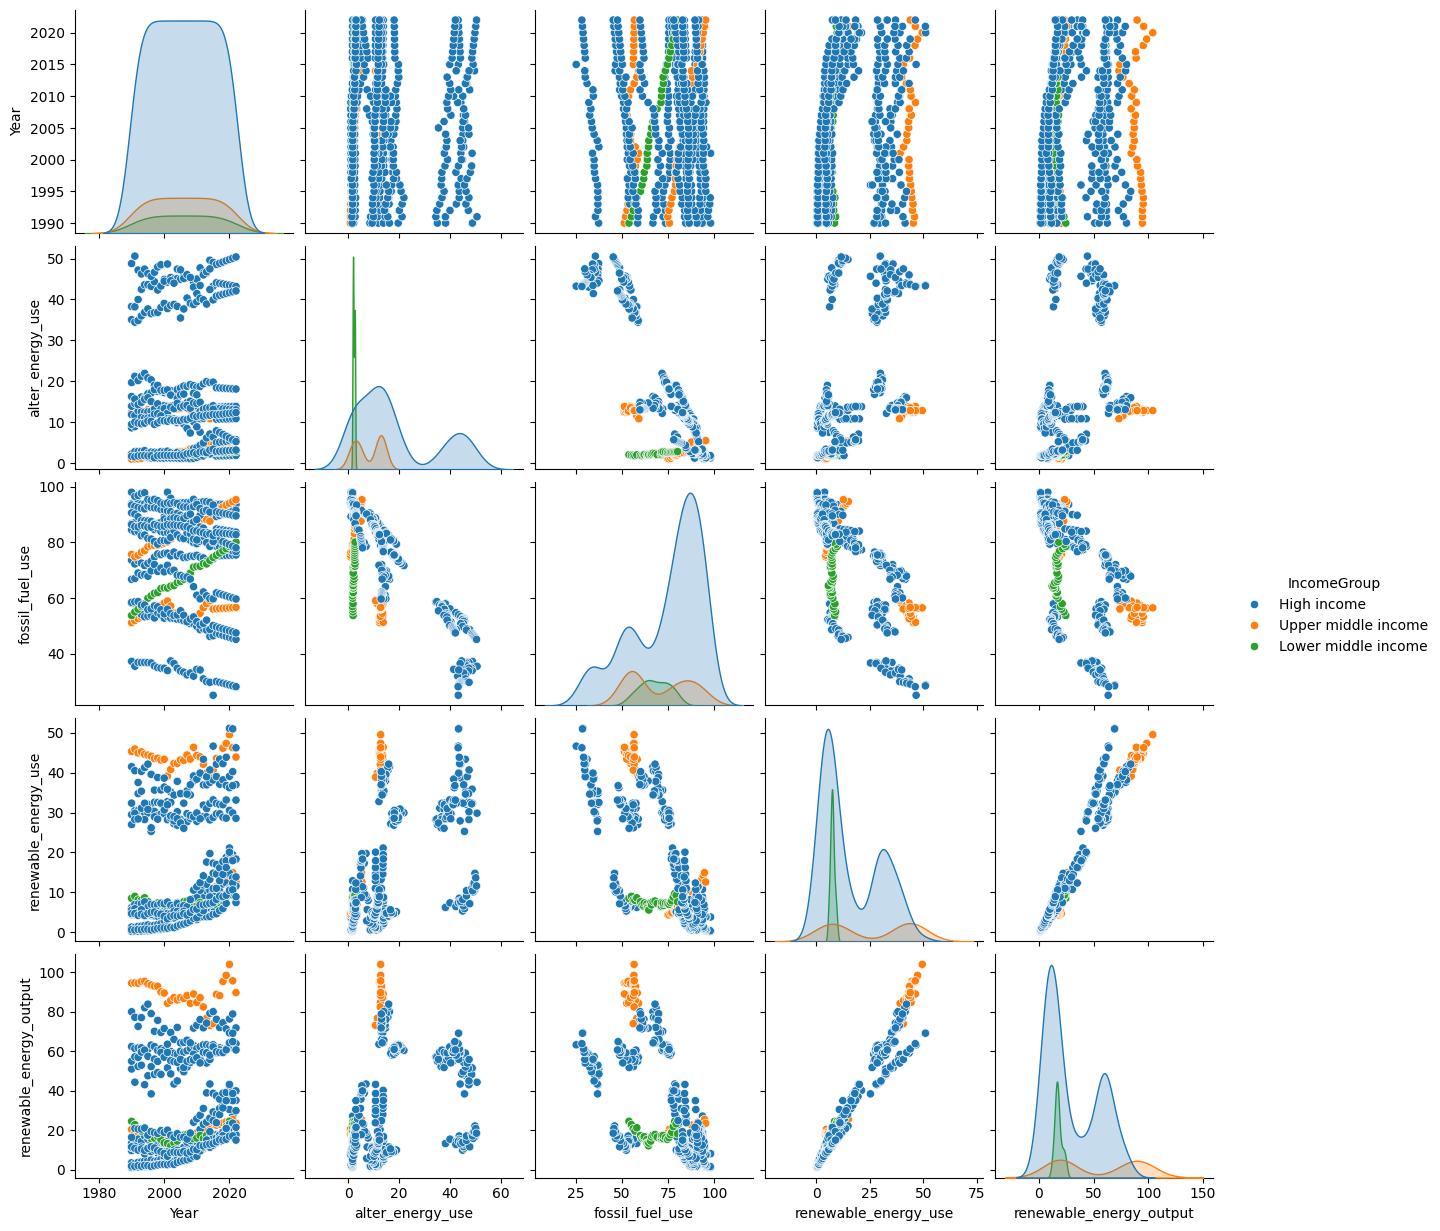

In [61]:
sns.pairplot(energy_df, hue = 'IncomeGroup')

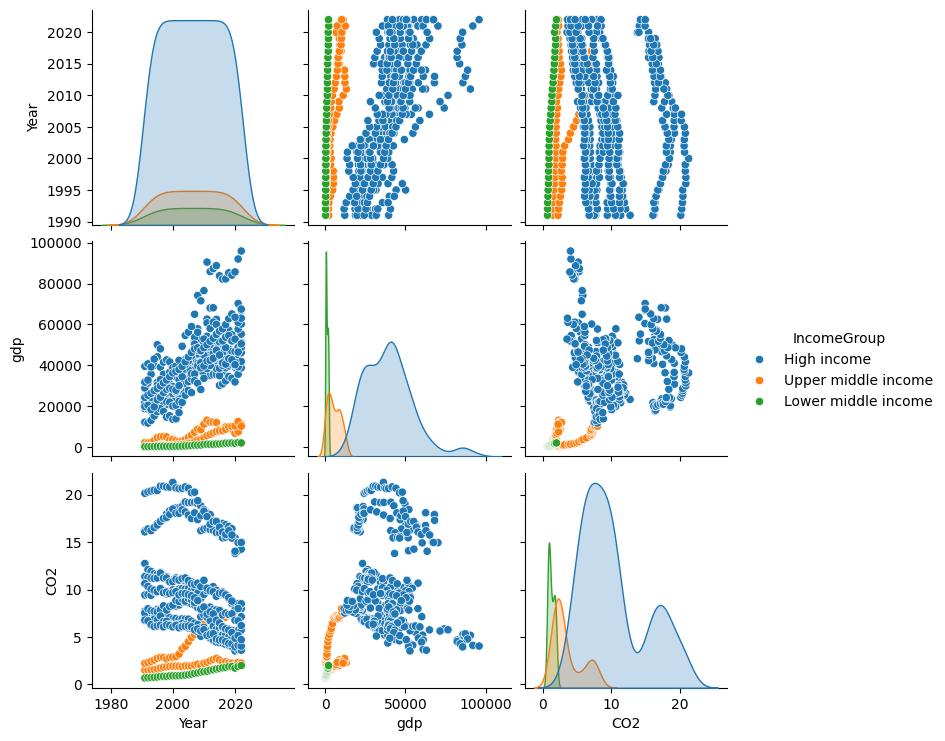

In [62]:
sns.pairplot(evaluate_df, hue = 'IncomeGroup')

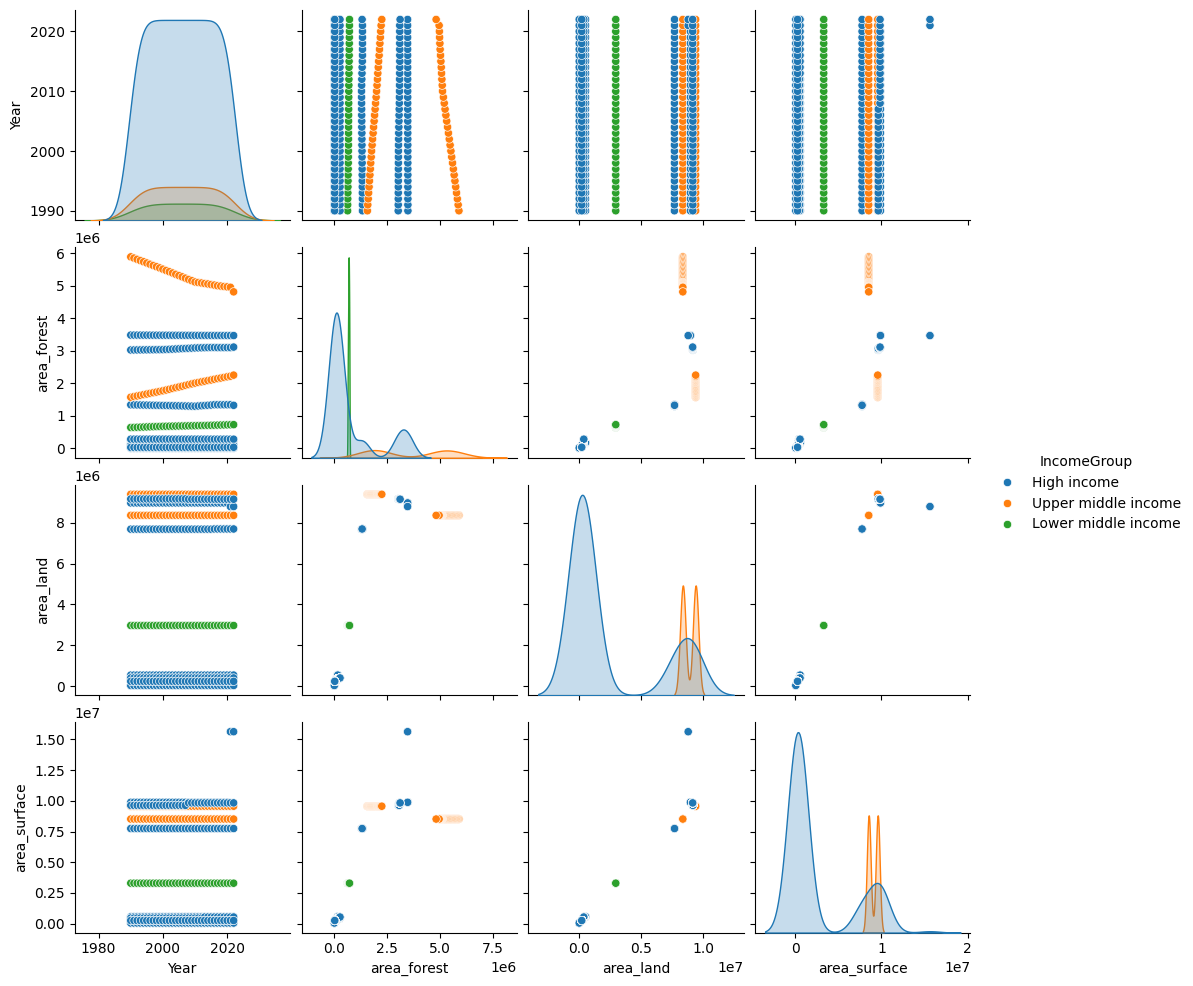

In [63]:
sns.pairplot(environment_df, hue = 'IncomeGroup')

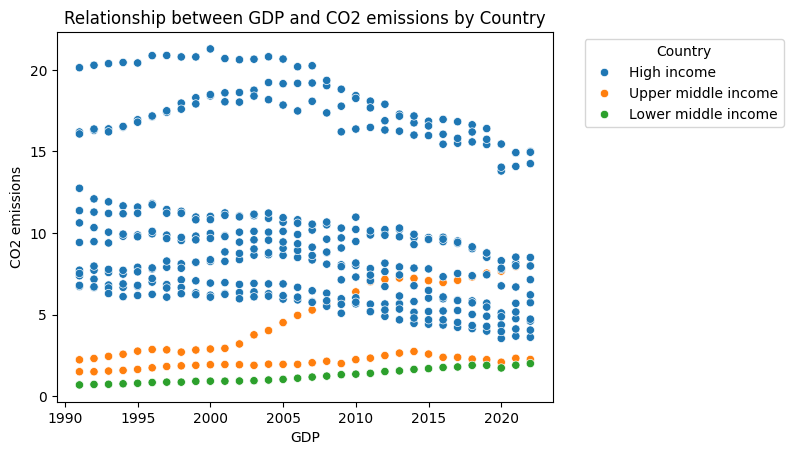

In [64]:
sns.scatterplot(data=evaluate_df, x='Year', y='CO2', hue='IncomeGroup')
plt.title('Relationship between GDP and CO2 emissions by Country')
plt.xlabel('GDP')
plt.ylabel('CO2 emissions')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Add Geographical Data

In [65]:
# Merge data
data = pd.merge(energy_df, evaluate_df, on =['Country Name', 'Year'])
data = pd.merge(data, environment_df, on = ['Country Name', 'Year'])

print(data.shape)
data.head(5)

(480, 14)


Country Name IncomeGroup_x  Year  alter_energy_use  fossil_fuel_use  \
0    Australia   High income  1991              1.44            93.69   
1    Australia   High income  1992              1.36            94.34   
2    Australia   High income  1993              1.40            93.76   
3    Australia   High income  1994              1.39            93.89   
4    Australia   High income  1995              1.33            93.83   

   renewable_energy_use  renewable_energy_output IncomeGroup_y      gdp   CO2  \
0                  4.74                    10.60   High income 18860.58 16.19   
1                  4.73                    10.07   High income 18624.56 16.29   
2                  4.76                    10.55   High income 17700.12 16.38   
3                  4.53                    10.19   High income 18129.79 16.49   
4                  4.24                     9.62   High income 20446.72 16.94   

   IncomeGroup  area_forest  area_land  area_surface  
0  High income   1336753.90 7682300.00    7741220.00  
1  High income   1334685.80 7682300.00    7741220.00  
2  High income   1332617.70 7682300.00    7741220.00  
3  High income   1330549.60 7682300.00    7741220.00  
4  High income   1328481.50 7682300.00    7741220.00

In [66]:
# Check missing values
data.isnull().sum()

Country Name               0
IncomeGroup_x              0
Year                       0
alter_energy_use           0
fossil_fuel_use            0
renewable_energy_use       0
renewable_energy_output    0
IncomeGroup_y              0
gdp                        0
CO2                        0
IncomeGroup                0
area_forest                0
area_land                  0
area_surface               0
dtype: int64

In [67]:
# Get geographical data
geo_data = pd.read_csv("world_country.csv")
geo_data.rename(columns={'country': 'Country Name'}, inplace=True)
geo_data = geo_data[geo_data['Country Name'].isin(country_list)]
geo_data.head(5)

country_code  latitude  longitude Country Name usa_state_code  \
13           AU    -25.27     133.78    Australia             ID   
28           BR    -14.24     -51.93       Brazil             ND   
35           CA     56.13    -106.35       Canada             OH   
40           CH     46.82       8.23  Switzerland             RI   
45           CN     35.86     104.20        China             UT   

    usa_state_latitude  usa_state_longitude     usa_state  
13               44.07              -114.74         Idaho  
28               47.55              -101.00  North Dakota  
35               40.42               -82.91          Ohio  
40               41.58               -71.48  Rhode Island  
45               39.32              -111.09          Utah

In [68]:
# Add geographical data
data = data.merge(geo_data[['Country Name', 'latitude', 'longitude']], on = 'Country Name', how = 'left')
reorder_columns = ['Country Name', 'latitude', 'longitude', 'IncomeGroup', 'Year', 'alter_energy_use', 'fossil_fuel_use', 'renewable_energy_use', 'renewable_energy_output', 'gdp', 'CO2', 'area_forest', 'area_land', 'area_surface']
data = data[reorder_columns]
data = data.rename(columns = {'Country Name': 'CountryName'})

# Check data
print(data.shape)
data.head(5)


(480, 14)


CountryName  latitude  longitude  IncomeGroup  Year  alter_energy_use  \
0   Australia    -25.27     133.78  High income  1991              1.44   
1   Australia    -25.27     133.78  High income  1992              1.36   
2   Australia    -25.27     133.78  High income  1993              1.40   
3   Australia    -25.27     133.78  High income  1994              1.39   
4   Australia    -25.27     133.78  High income  1995              1.33   

   fossil_fuel_use  renewable_energy_use  renewable_energy_output      gdp  \
0            93.69                  4.74                    10.60 18860.58   
1            94.34                  4.73                    10.07 18624.56   
2            93.76                  4.76                    10.55 17700.12   
3            93.89                  4.53                    10.19 18129.79   
4            93.83                  4.24                     9.62 20446.72   

    CO2  area_forest  area_land  area_surface  
0 16.19   1336753.90 7682300.00    7741220.00  
1 16.29   1334685.80 7682300.00    7741220.00  
2 16.38   1332617.70 7682300.00    7741220.00  
3 16.49   1330549.60 7682300.00    7741220.00  
4 16.94   1328481.50 7682300.00    7741220.00

### Save file

In [69]:
data.to_csv("data.csv", index=False, mode = 'w')

### EDA

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CountryName              480 non-null    object 
 1   latitude                 480 non-null    float64
 2   longitude                480 non-null    float64
 3   IncomeGroup              480 non-null    object 
 4   Year                     480 non-null    int64  
 5   alter_energy_use         480 non-null    float64
 6   fossil_fuel_use          480 non-null    float64
 7   renewable_energy_use     480 non-null    float64
 8   renewable_energy_output  480 non-null    float64
 9   gdp                      480 non-null    float64
 10  CO2                      480 non-null    float64
 11  area_forest              480 non-null    float64
 12  area_land                480 non-null    float64
 13  area_surface             480 non-null    float64
dtypes: float64(11), int64(1), 

In [71]:
data.describe()

latitude  longitude    Year  alter_energy_use  fossil_fuel_use  \
count    480.00     480.00  480.00            480.00           480.00   
mean      30.61      28.67 2006.50             15.71            73.21   
std       30.70      80.19    9.24             14.92            18.00   
min      -40.90    -106.35 1991.00              0.99            25.12   
25%       20.59      -3.44 1998.75              2.79            57.27   
50%       41.87      10.45 2006.50             12.30            78.99   
75%       52.13     104.20 2014.25             18.14            87.68   
max       60.13     174.89 2022.00             50.59            98.05   

       renewable_energy_use  renewable_energy_output      gdp    CO2  \
count                480.00                   480.00   480.00 480.00   
mean                  16.51                    32.34 32466.46   8.81   
std                   14.43                    26.74 19808.84   5.24   
min                    0.32                     1.26   301.50   0.69   
25%                    5.25                    11.24 20133.48   5.50   
50%                    8.54                    18.66 33951.91   7.88   
75%                   29.79                    58.02 44720.16  10.98   
max                   51.06                   104.00 95885.98  21.28   

       area_forest  area_land  area_surface  
count       480.00     480.00        480.00  
mean    1120757.99 3270329.94    3448286.37  
std     1572776.34 3923156.12    4157473.57  
min        3467.47   33670.00      41290.70  
25%       92836.28  263310.00     267710.00  
50%      249350.00  407339.70     447420.11  
75%     1735250.57 8358140.00    8515770.00  
max     5851170.60 9388250.00   15634410.00

In [72]:
print(f"Data shape: {data.shape}\n")
data.info()

Data shape: (480, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CountryName              480 non-null    object 
 1   latitude                 480 non-null    float64
 2   longitude                480 non-null    float64
 3   IncomeGroup              480 non-null    object 
 4   Year                     480 non-null    int64  
 5   alter_energy_use         480 non-null    float64
 6   fossil_fuel_use          480 non-null    float64
 7   renewable_energy_use     480 non-null    float64
 8   renewable_energy_output  480 non-null    float64
 9   gdp                      480 non-null    float64
 10  CO2                      480 non-null    float64
 11  area_forest              480 non-null    float64
 12  area_land                480 non-null    float64
 13  area_surface             480 non-null    float64
dtypes: 

In [73]:
uni_country = data['CountryName'].unique()
print(f"There are {len(uni_country)} unique countries in the data includes:{uni_country}\n")

country_income = data.groupby('CountryName')['IncomeGroup'].unique().to_dict()
print("Country with its income group: ")
for country, income in country_income.items():
    print(f"{country}:{income}")


time_period = data['Year'].unique()
print(f"\nTime periods in the data is :{time_period}, in total {len(time_period)} years.")

There are 15 unique countries in the data includes:['Australia' 'Brazil' 'Canada' 'China' 'France' 'Germany' 'India' 'Italy'
 'Japan' 'Netherlands' 'New Zealand' 'Sweden' 'Switzerland'
 'United Kingdom' 'United States']

Country with its income group: 
Australia:['High income']
Brazil:['Upper middle income']
Canada:['High income']
China:['Upper middle income']
France:['High income']
Germany:['High income']
India:['Lower middle income']
Italy:['High income']
Japan:['High income']
Netherlands:['High income']
New Zealand:['High income']
Sweden:['High income']
Switzerland:['High income']
United Kingdom:['High income']
United States:['High income']

Time periods in the data is :[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022], in total 32 years.


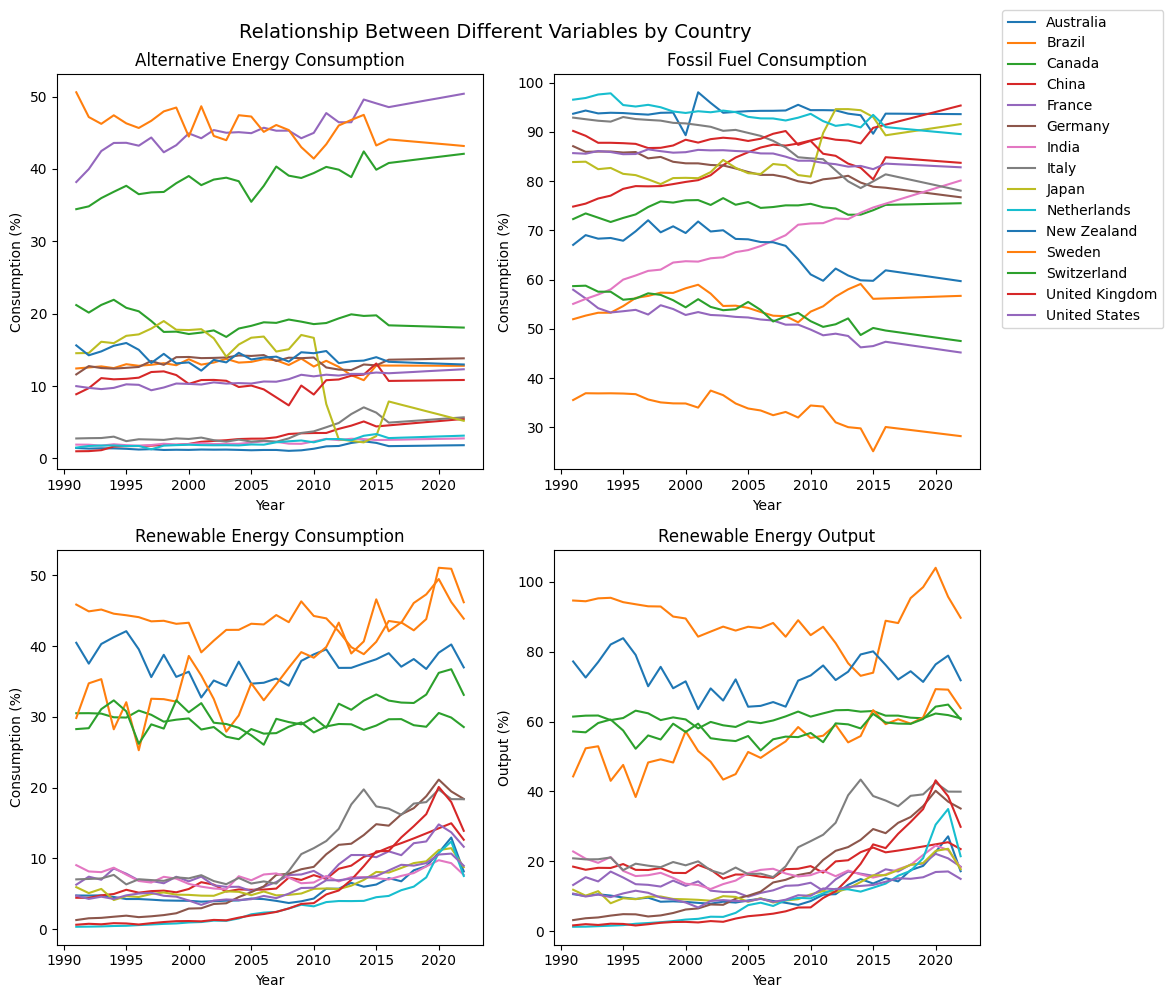

In [74]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10, 10))


unique_countries = data['CountryName'].unique()


for country in unique_countries:
    country_data = data[data['CountryName'] == country]
    
    # Scatter plot for the current country
    axes[0, 0].plot(country_data['Year'], country_data['alter_energy_use'], label=country)
    axes[0, 1].plot(country_data['Year'], country_data['fossil_fuel_use'], label=country)
    axes[1, 0].plot(country_data['Year'], country_data['renewable_energy_use'], label=country)
    axes[1, 1].plot(country_data['Year'], country_data['renewable_energy_output'], label=country)
    
axes[0, 0].set_title('Alternative Energy Consumption')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Consumption (%)')

axes[0, 1].set_title('Fossil Fuel Consumption')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Consumption (%)')

axes[1, 0].set_title('Renewable Energy Consumption')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Consumption (%)')

axes[1, 1].set_title('Renewable Energy Output')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Output (%)')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Relationship Between Different Variables by Country", fontsize = 14)
plt.tight_layout()
plt.show()


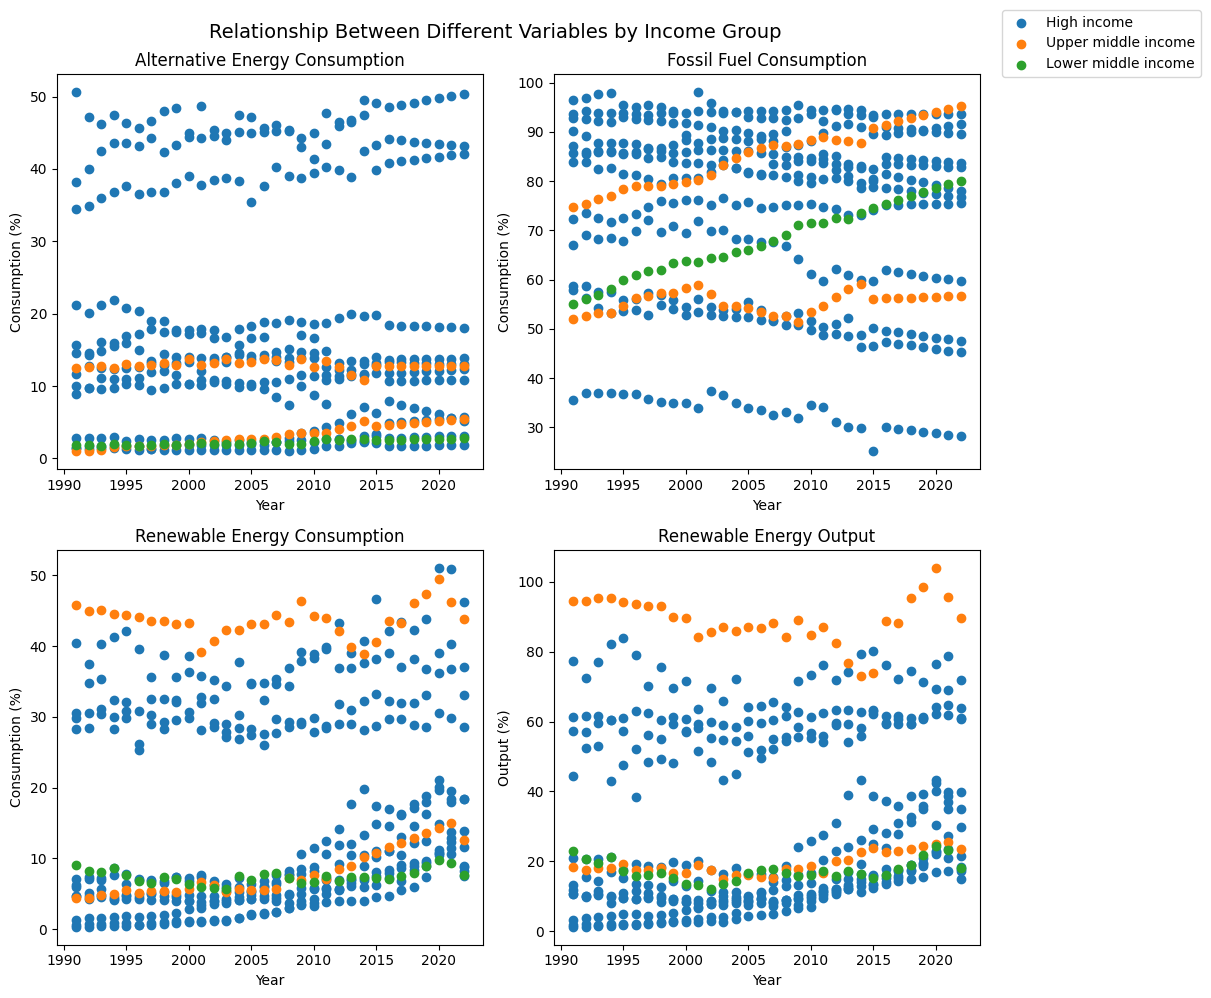

In [75]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10, 10))


unique_income = data['IncomeGroup'].unique()


for income_group in unique_income:
    group_data = data[data['IncomeGroup'] == income_group]
    
    # Scatter plot for the current country
    axes[0, 0].scatter(group_data['Year'], group_data['alter_energy_use'], label=income_group)
    axes[0, 1].scatter(group_data['Year'], group_data['fossil_fuel_use'], label=income_group)
    axes[1, 0].scatter(group_data['Year'], group_data['renewable_energy_use'], label=income_group)
    axes[1, 1].scatter(group_data['Year'], group_data['renewable_energy_output'], label=income_group)
    
axes[0, 0].set_title('Alternative Energy Consumption')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Consumption (%)')

axes[0, 1].set_title('Fossil Fuel Consumption')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Consumption (%)')

axes[1, 0].set_title('Renewable Energy Consumption')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Consumption (%)')

axes[1, 1].set_title('Renewable Energy Output')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Output (%)')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Relationship Between Different Variables by Income Group", fontsize = 14)
plt.tight_layout()
plt.show()


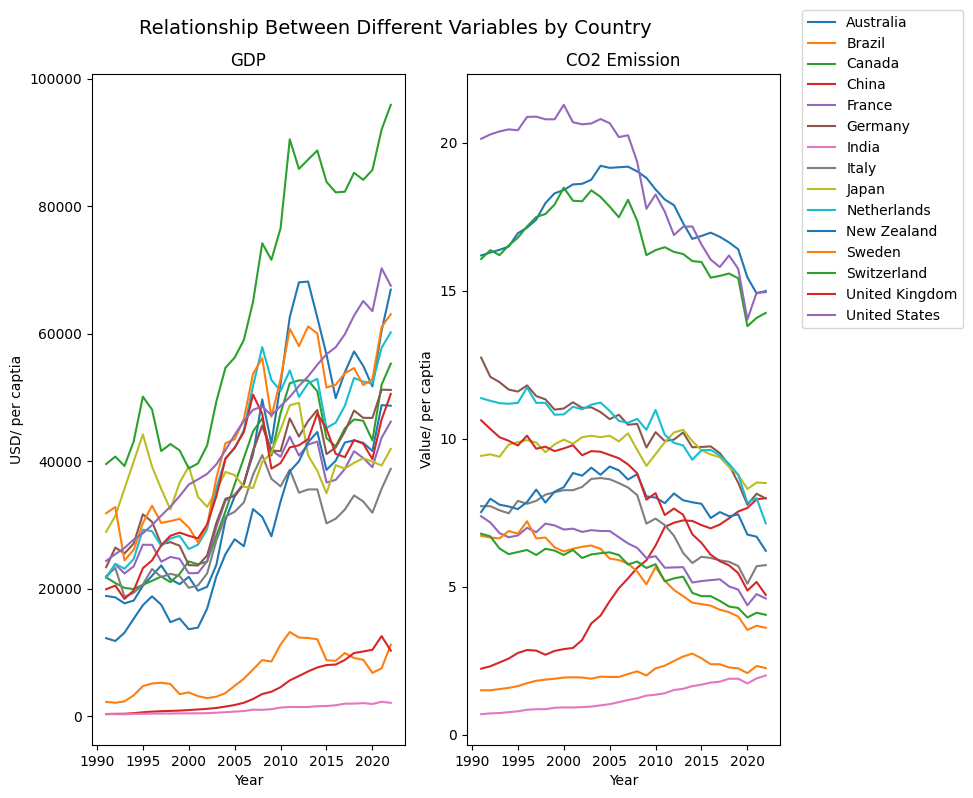

In [76]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(8, 8))


unique_countries = data['CountryName'].unique()


for country in unique_countries:
    country_data = data[data['CountryName'] == country]
    
    axes[0].plot(country_data['Year'], country_data['gdp'], label=country)
    axes[1].plot(country_data['Year'], country_data['CO2'], label=country)

    
axes[0].set_title('GDP')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('USD/ per captia')

axes[1].set_title('CO2 Emission')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value/ per captia')



handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Relationship Between Different Variables by Country", fontsize = 14)
plt.tight_layout()
plt.show()


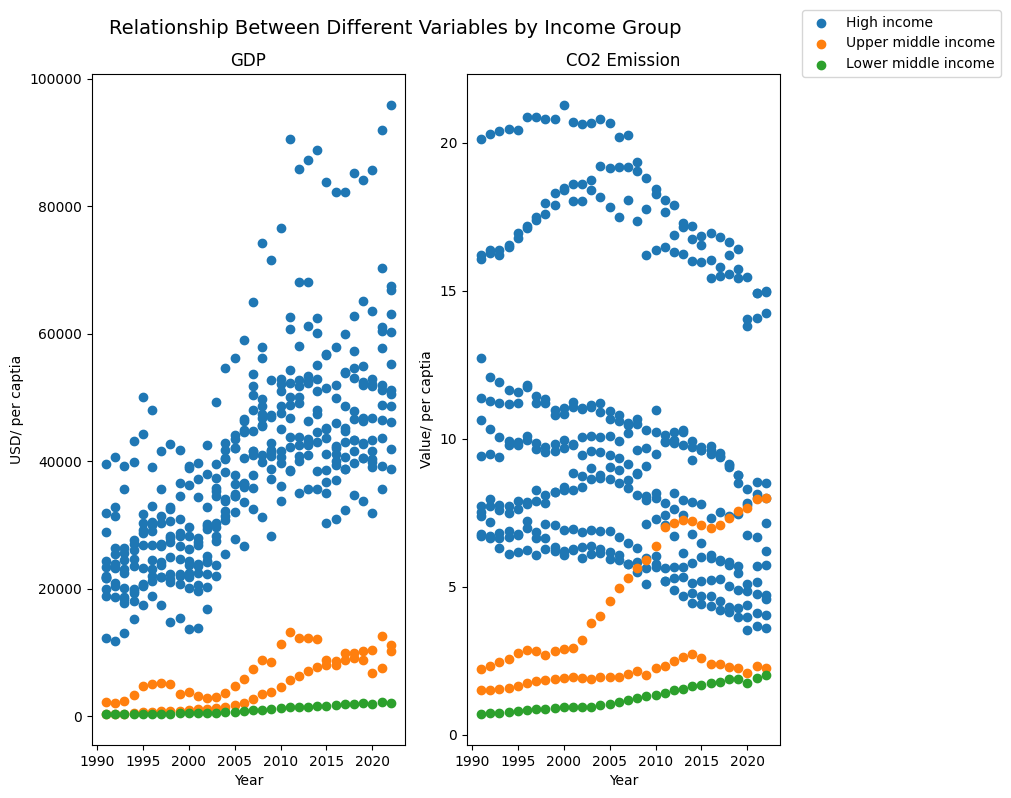

In [77]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(8, 8))


unique_income = data['IncomeGroup'].unique()


for income_group in unique_income:
    group_data = data[data['IncomeGroup'] == income_group]
    
    axes[0].scatter(group_data['Year'], group_data['gdp'], label=income_group)
    axes[1].scatter(group_data['Year'], group_data['CO2'], label=income_group)


    
axes[0].set_title('GDP')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('USD/ per captia')

axes[1].set_title('CO2 Emission')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value/ per captia')



handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Relationship Between Different Variables by Income Group", fontsize = 14)
plt.tight_layout()
plt.show()


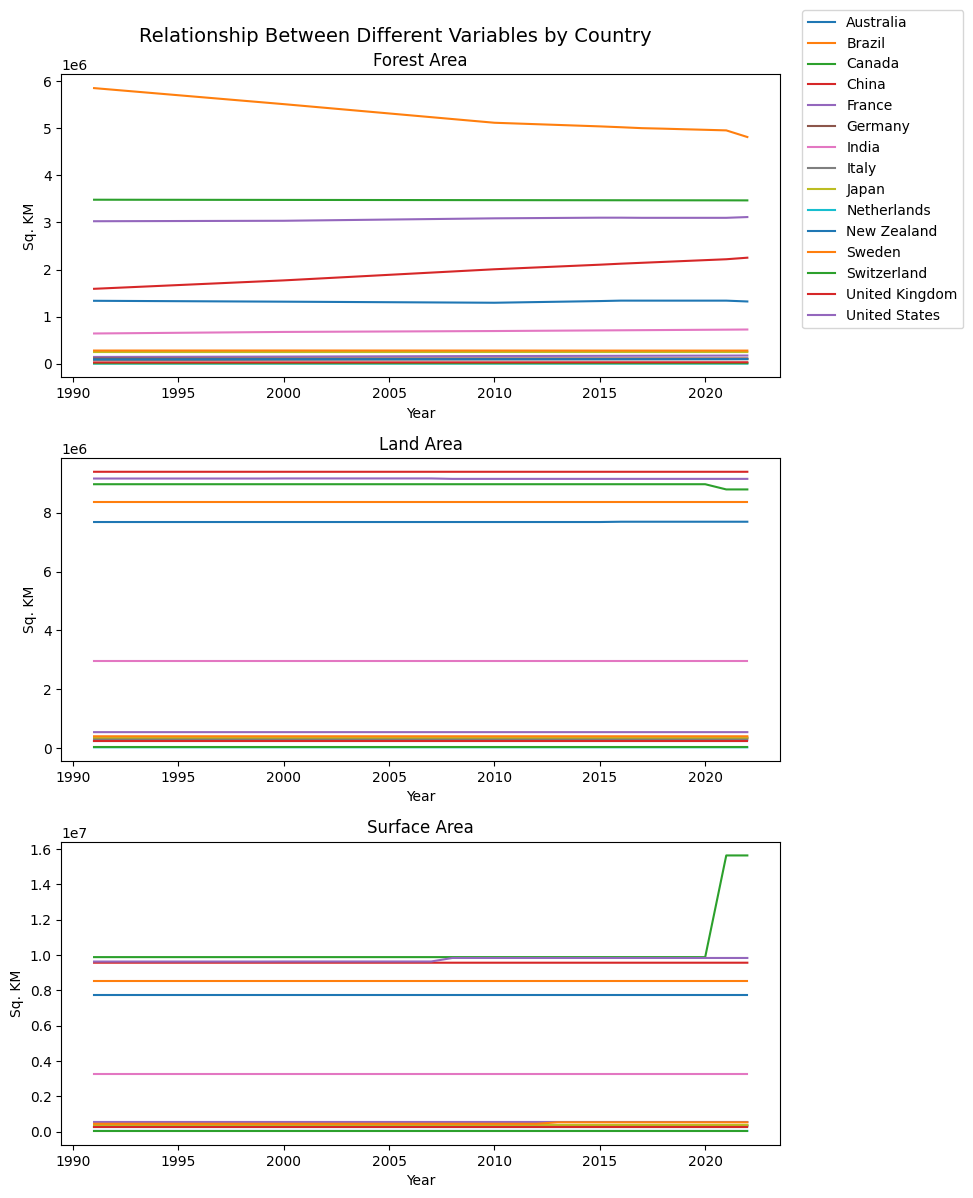

In [78]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 1, figsize=(8, 12))


unique_countries = data['CountryName'].unique()


for country in unique_countries:
    country_data = data[data['CountryName'] == country]
    
    axes[0].plot(country_data['Year'], country_data['area_forest'], label=country)
    axes[1].plot(country_data['Year'], country_data['area_land'], label=country)
    axes[2].plot(country_data['Year'], country_data['area_surface'], label=country)

    
axes[0].set_title('Forest Area')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sq. KM')

axes[1].set_title('Land Area')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sq. KM')

axes[2].set_title('Surface Area')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Sq. KM')



handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Relationship Between Different Variables by Country", fontsize = 14)
plt.tight_layout()
plt.show()


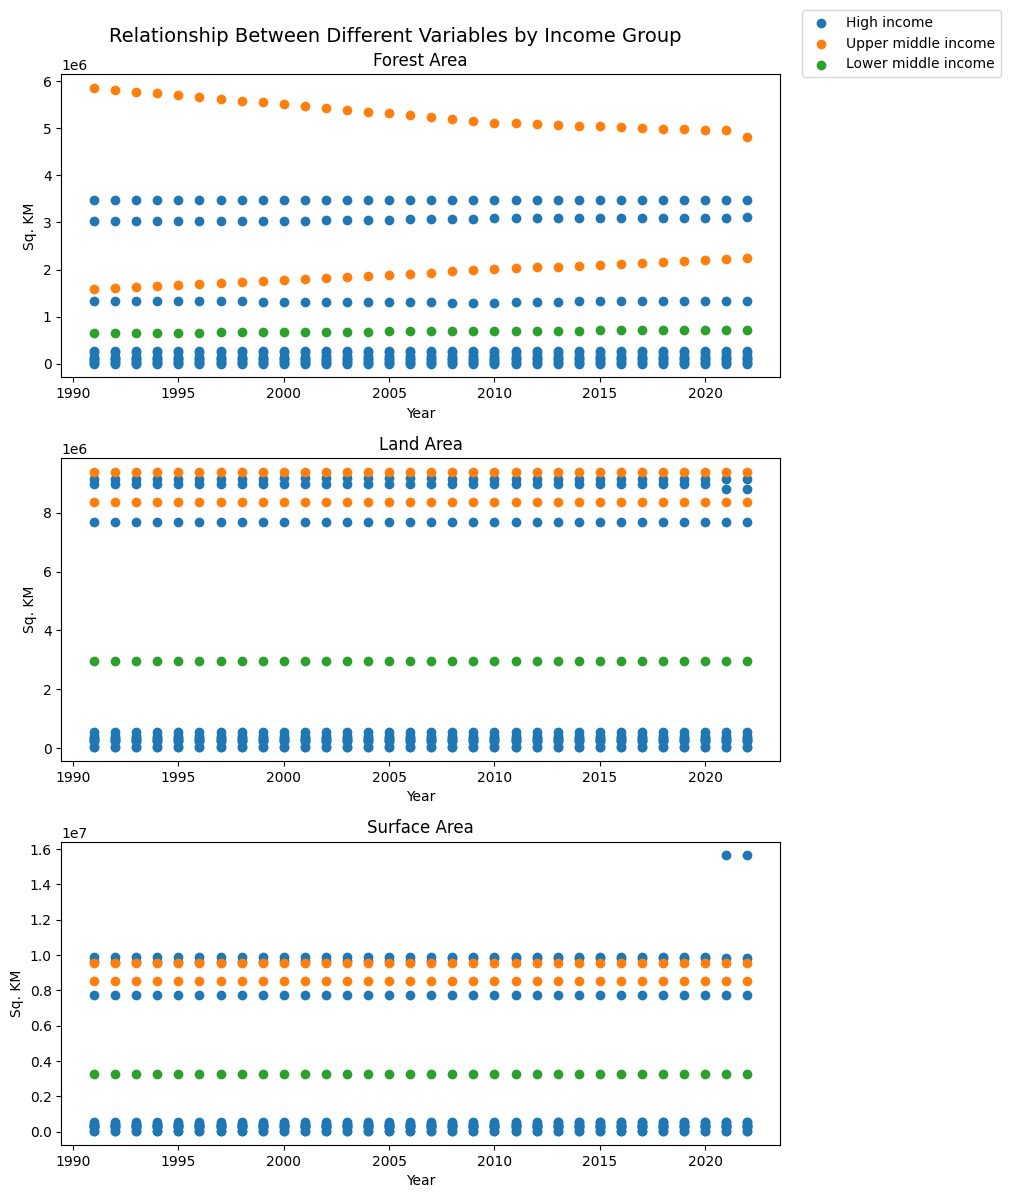

In [79]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 1, figsize=(8, 12))


unique_income = data['IncomeGroup'].unique()


for income_group in unique_income:
    group_data = data[data['IncomeGroup'] == income_group]
    
    axes[0].scatter(group_data['Year'], group_data['area_forest'], label=income_group)
    axes[1].scatter(group_data['Year'], group_data['area_land'], label=income_group)
    axes[2].scatter(group_data['Year'], group_data['area_surface'], label=income_group)


    
axes[0].set_title('Forest Area')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sq. KM')

axes[1].set_title('Land Area')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sq. KM')

axes[2].set_title('Surface Area')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Sq. KM')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Relationship Between Different Variables by Income Group", fontsize = 14)
plt.tight_layout()
plt.show()
